# Introduction
- Name : Wawan Setiawan Syamsul

Experienced Hotel Accounting Supervisor with a background in optimizing productivity and efficiency in accounting environments, now transitioning into a Data Scientist role following the completion of the Hacktiv8 Data Science Bootcamp. With over 4 years of expertise in the Hotel Accounting industry, I bring a strong foundation in organizational skills and cross-functional collaboration. My track record of dependability and support complements my transition to a Data Scientist role. As an Entry-level Data Scientist, I possess the skills to build and test machine learning models, utilizing my proficiency in SQL and Python. My background in industrial engineering provides me with a unique ability to generate strategic insights from data models, contributing to data-driven decision-making.


# ABSTRACT

## Background
This study presents an exploratory analysis of banking data to uncover potential insights and patterns related to customer behavior, credit risk assessment, geographic influences, customer segmentations, and time series trends. The analysis is conducted by integrating multiple tables containing transaction records, customer demographics, and district characteristics. The study employs various analytical techniques to extract valuable information from the data.

## Objective
In the realm of Customer Behavior Analysis, the study investigates transaction frequency patterns among different account types, distinguishing between owners and users. Additionally, the research delves into the average transaction amounts and account balances across distinct demographic regions. The analysis further dissects transaction types, such as credit and debit, based on customer attributes, uncovering trends and correlations between demographics and transaction behaviors.

Credit Risk Assessment is another focal point, wherein the study evaluates the intricate connection between client demographics and their credit activities. Notably, the study scrutinizes credit utilization ratios among diverse demographic groups and explores the relationship between unemployment rates and loan default rates. By employing these insights, the study contributes to the enhancement of credit risk assessment strategies.

Geographic Analysis explores the interplay between district characteristics and banking activities. The study investigates how features like district population and urban ratio influence banking behaviors, yielding valuable insights into regional banking dynamics.

Time Series Analysis forms an essential component of this study, unraveling transaction trends and patterns over time. The study identifies peak transaction periods and explores any seasonality in transaction frequencies or amounts. By uncovering temporal trends, the research contributes to proactive decision-making for resource allocation and customer service enhancements.

Furthermore, the study employs advanced techniques such as Customer Segmentations, wherein clustering algorithms are utilized to group customers based on transaction behaviors and demographic attributes. These segments provide a deeper understanding of customer profiles and enable tailored services. The identification of high-value customers based on criteria such as average salary, transaction volume, and account types is an integral part of this analysis.

## Overall Objective
In conclusion, this study amalgamates diverse data sources to extract meaningful insights from banking data. Through the application of rigorous analytical methods, it sheds light on customer behavior, credit risk assessment, geographic influences, customer segmentation, and temporal patterns. The findings generated by this study have the potential to drive informed decisions for improving banking services, risk assessment, and customer experience.

# ABOUT DATASET

The dataset, ["The Berka Dataset,"](https://www.kaggle.com/datasets/marceloventura/the-berka-dataset) available on Kaggle, is a comprehensive collection of banking and financial transaction records. Curated by Marcelo Ventura, this dataset encompasses a wide array of information, including customer demographics, transaction details, account attributes, and geographic data. With a focus on real-world financial interactions, the dataset offers a rich and multifaceted glimpse into customer behavior, credit risk assessment, geographic trends, customer segmentation, and temporal patterns. This dataset provides a valuable resource for conducting in-depth analyses and deriving meaningful insights in the fields of finance, economics, and data science. Its multidimensional nature makes it suitable for exploring various research questions and fostering a deeper understanding of financial dynamics.

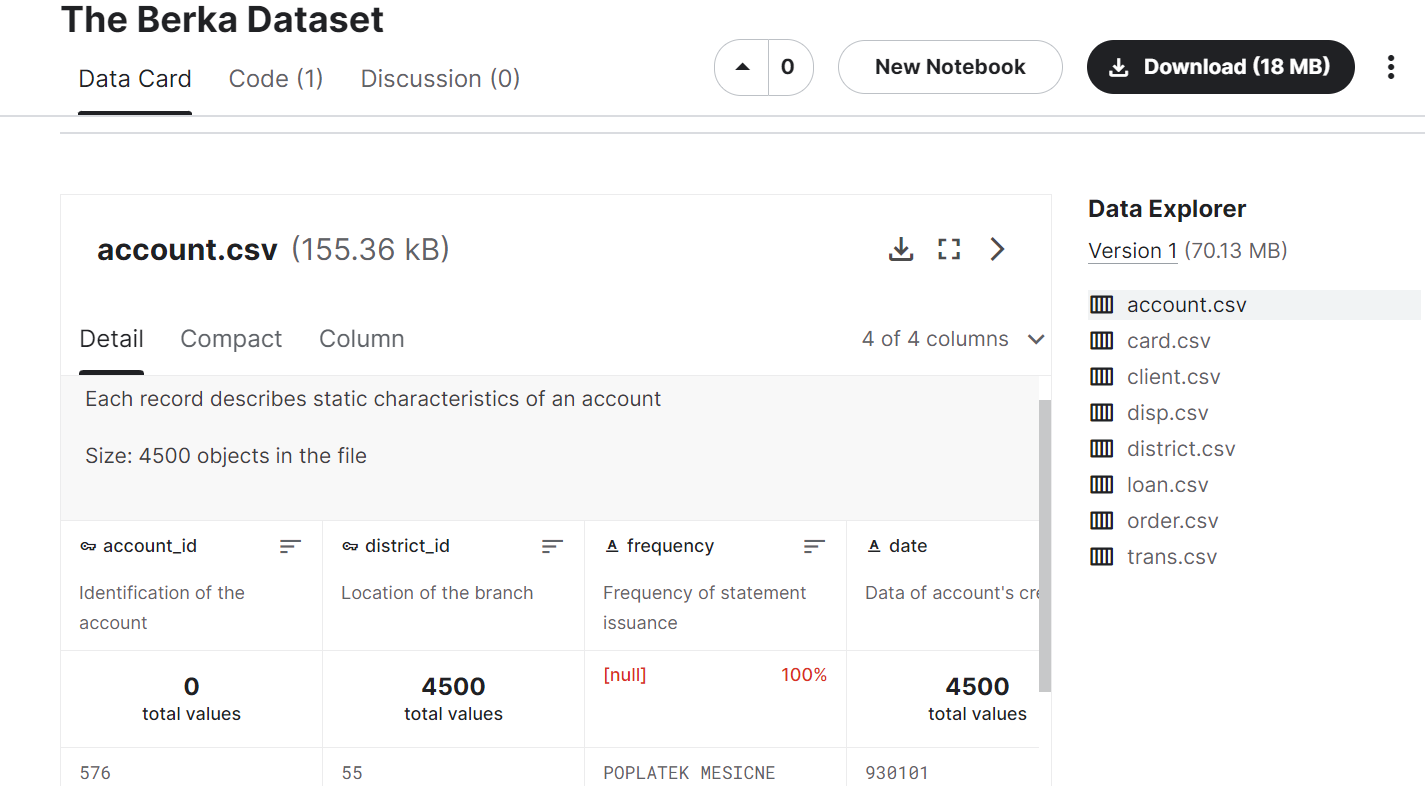

# FEATURE INSTALLATION

In [1]:
# Install feature engineering
! pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 5.9 MB/s eta 0:00:00


# IMPORT LIBRARY

In [2]:
# Import Data Manipulation and Analysis Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import statsmodels.api as sm

# Import Statistical and Machine Learning Libraries
import sklearn as sk
import scipy as sc
from scipy import stats
from scipy.stats import t

# Import Data Preprocessing and Feature Engineering Libraries
from sklearn.preprocessing import RobustScaler

# Import Dimensionality Reduction and Clustering Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Model save
from sklearn.pipeline import Pipeline
import pickle

# Other Libraries
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore')

# LOAD DATA

In [3]:
# Read transaction data from a CSV file into a DataFrame
df_trans = pd.read_csv("/content/trans.csv", sep=";", encoding='utf-8')

# Read account data from a CSV file into a DataFrame
df_account = pd.read_csv("/content/account.csv", sep=";", encoding='utf-8')

# Read district data from a CSV file into a DataFrame
df_district = pd.read_csv("/content/district.csv", sep=";", encoding='utf-8')

# Read client data from a CSV file into a DataFrame
df_client = pd.read_csv("/content/client.csv", sep=";", encoding='utf-8')

# Read disposition data from a CSV file into a DataFrame
df_disp = pd.read_csv("/content/disp.csv", sep=";", encoding='utf-8')

In [4]:
# Create a dictionary to store dataframes
dataframes = {
    "Transactions": df_trans,
    "Accounts": df_account,
    "Districts": df_district,
    "Clients": df_client,
    "Dispositions": df_disp
}

# Display the first few rows of each dataframe
for name, df in dataframes.items():
    print(f"Data for: {name}")
    display(df.head())
    print("\n")

Data for: Transactions


trans_id  account_id    date    type operation  amount  balance k_symbol  \
0    695247        2378  930101  PRIJEM     VKLAD   700.0    700.0      NaN   
1    171812         576  930101  PRIJEM     VKLAD   900.0    900.0      NaN   
2    207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0      NaN   
3   1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0      NaN   
4    579373        1972  930102  PRIJEM     VKLAD   400.0    400.0      NaN   

  bank  account  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN



Data for: Accounts


account_id  district_id         frequency    date
0         576           55  POPLATEK MESICNE  930101
1        3818           74  POPLATEK MESICNE  930101
2         704           55  POPLATEK MESICNE  930101
3        2378           16  POPLATEK MESICNE  930101
4        2632           24  POPLATEK MESICNE  930102



Data for: Districts


A1           A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0   1  Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1   2      Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2   3       Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3   4       Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4   5        Kolin  central Bohemia    95616  65  30   4   1   6   51.4   

     A11   A12   A13  A14    A15    A16  
0  12541  0.29  0.43  167  85677  99107  
1   8507  1.67  1.85  132   2159   2674  
2   8980  1.95  2.21  111   2824   2813  
3   9753  4.64  5.05  109   5244   5892  
4   9307  3.85  4.43  118   2616   3040



Data for: Clients


client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
3          4        561201            5
4          5        605703            5



Data for: Dispositions


disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT

# EXPLORATORY DATA ANALYSIS

### Define Data Type

In [5]:
# Display the head() of each dataframe
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    display(df.info())
    print("\n")

DataFrame: Transactions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


None



DataFrame: Accounts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


None



DataFrame: Districts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      77 non-null     int64  
 1   A2      77 non-null     object 
 2   A3      77 non-null     object 
 3   A4      77 non-null     int64  
 4   A5      77 non-null     int64  
 5   A6      77 non-null     int64  
 6   A7      77 non-null     int64  
 7   A8      77 non-null     int64  
 8   A9      77 non-null     int64  
 9   A10     77 non-null     float64
 10  A11     77 non-null     int64  
 11  A12     77 non-null     object 
 12  A13     77 non-null     float64
 13  A14     77 non-null     int64  
 14  A15     77 non-null     object 
 15  A16     77 non-null     int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 9.8+ KB


None



DataFrame: Clients
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


None



DataFrame: Dispositions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


None

### Define Missing Value

In [6]:
# Display the missing value of each dataframe
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    display(df.isnull().sum())
    print("\n")

DataFrame: Transactions


trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64



DataFrame: Accounts


account_id     0
district_id    0
frequency      0
date           0
dtype: int64



DataFrame: Districts


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64



DataFrame: Clients


client_id       0
birth_number    0
district_id     0
dtype: int64



DataFrame: Dispositions


disp_id       0
client_id     0
account_id    0
type          0
dtype: int64

The "Transactions" DataFrame presents a record of financial transactions, featuring attributes such as transaction IDs, account IDs, dates, transaction types, operations, amounts, balances, transaction categories (k_symbol), associated banks, and related account information. While most columns are adequately populated, some entries are missing in the "operation," "k_symbol," "bank," and "account" columns. This DataFrame serves as a foundational source for exploring banking activities, transaction patterns, and financial insights.

### Define Data Schema

[Source : https://webpages.charlotte.edu/mirsad/itcs6265/group1/domain.html](https://webpages.charlotte.edu/mirsad/itcs6265/group1/domain.html)

**df_trans**
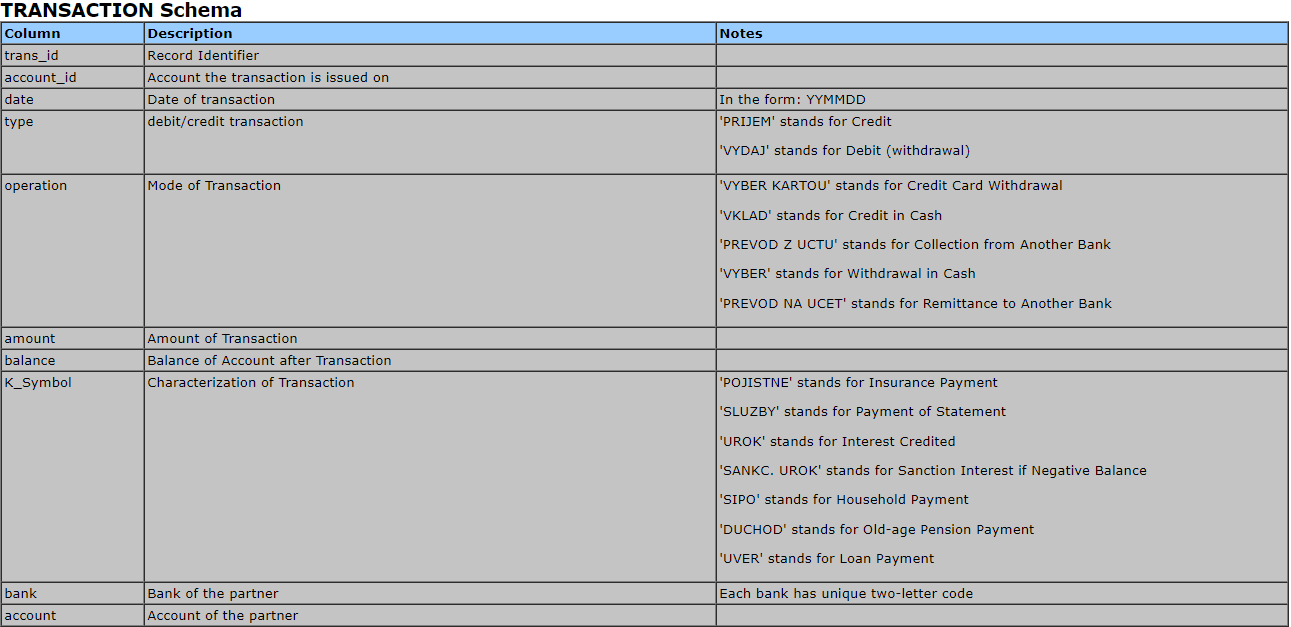

**df_account**

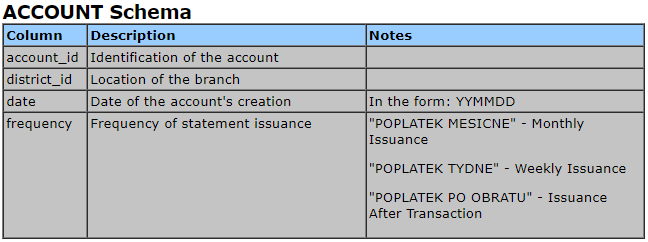

**df_district**

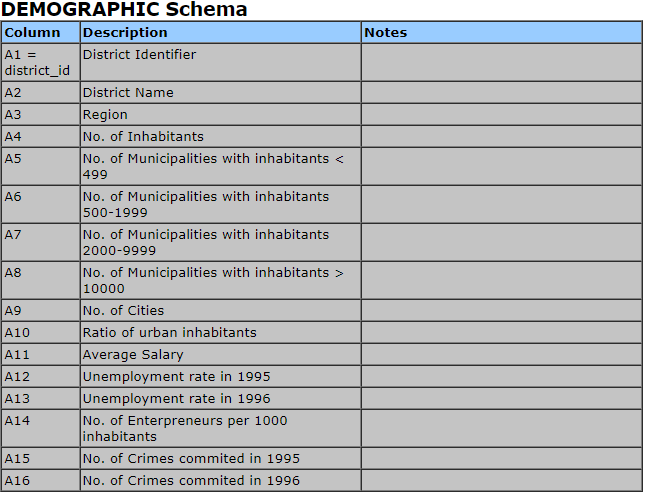



**df_client**

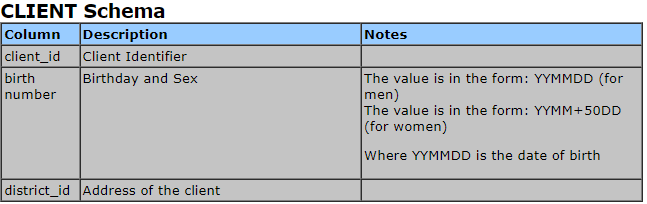

**df_disp**

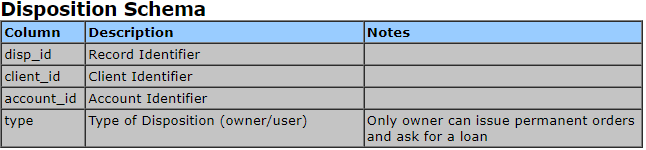

### Define Gender on df_client

In [7]:
# Initialize the 'gender' column with None values
df_client['gender'] = None

# Loop through each row in the 'df_client' dataframe
for index, row in df_client.iterrows():
    birth_number = row['birth_number']
    year = birth_number // 10000
    day = (birth_number // 100) % 100

    # Determine gender based on birth day
    if day <= 31:
        gender = 'male'
    else:
        day -= 50
        gender = 'female'

    # Assign determined gender to the 'gender' column
    df_client.at[index, 'gender'] = gender

# Display the updated 'df_client' dataframe
df_client

client_id  birth_number  district_id  gender
0             1        706213           18  female
1             2        450204            1    male
2             3        406009            1  female
3             4        561201            5    male
4             5        605703            5  female
...         ...           ...          ...     ...
5364      13955        456030            1  female
5365      13956        430406            1    male
5366      13968        680413           61    male
5367      13971        626019           67  female
5368      13998        535812           74  female

[5369 rows x 4 columns]

### Define Nan Value on operation column on df_trans

In [8]:
df_trans[df_trans['operation'].isna()]

trans_id  account_id    date    type operation  amount  balance  \
137       3591421        1844  930131  PRIJEM       NaN    12.6   3754.6   
138       3617490        2632  930131  PRIJEM       NaN    47.5  15411.5   
139       3579543        1493  930131  PRIJEM       NaN    13.3   5222.3   
140       3558798         866  930131  PRIJEM       NaN    37.1  13181.1   
141       3453599        6473  930131  PRIJEM       NaN    17.0  21078.0   
...           ...         ...     ...     ...       ...     ...      ...   
1056315   3626622        2906  981231  PRIJEM       NaN    62.3  13729.4   
1056316   3627616        2935  981231  PRIJEM       NaN    81.3  19544.9   
1056317   3625403        2869  981231  PRIJEM       NaN    60.2  14638.2   
1056318   3626683        2907  981231  PRIJEM       NaN   107.5  23453.0   
1056319   3626540        2902  981231  PRIJEM       NaN   164.1  41642.9   

        k_symbol bank  account  
137         UROK  NaN      NaN  
138         UROK  NaN      NaN  
139         UROK  NaN      NaN  
140         UROK  NaN      NaN  
141         UROK  NaN      NaN  
...          ...  ...      ...  
1056315     UROK  NaN      NaN  
1056316     UROK  NaN      NaN  
1056317     UROK  NaN      NaN  
1056318     UROK  NaN      NaN  
1056319     UROK  NaN      NaN  

[183114 rows x 10 columns]

all Nan value on `operation` column is equal UROK on k_symbol which related with Interest Credit as per Schema description, this possible to input missing value on operation as Interest

### Preparing Data for Analysis

In [9]:
# Merge df_account with df_district based on 'district_id'
behavior_data = df_trans.merge(df_account[['account_id', 'district_id']], on='account_id', how='left')
behavior_data = behavior_data.merge(df_district[['A1','A3','A4','A10', 'A11', 'A13']], left_on='district_id', right_on='A1', how='left')
behavior_data = behavior_data.drop(['A1'], axis=1)
behavior_data = behavior_data.merge(df_disp[['account_id','type','client_id']], on='account_id', how='left')
behavior_data = behavior_data.merge(df_client[['client_id','gender']], on='client_id', how='left')

# Convert 'date' column to datetime format
behavior_data['date'] = pd.to_datetime(behavior_data['date'], format='%y%m%d')

# Rename columns using the rename() method
column_rename_dict = {
    'A3': 'region',
    'A4': 'no_inhabitans',
    'A10': 'urban_ratio',
    'A11': 'average_salary',
    'A13': 'unemployment_rate_1996',
    'type_x': 'type',
    'type_y': 'type_disp'
}
behavior_data.rename(columns=column_rename_dict, inplace=True)

# Replace values in the 'type' column
type_mapping = {
    'PRIJEM': 'Trans_Credit',
    'VYDAJ': 'Trans_Debit',
    'VYBER': 'Trans Withdrawal'
}
behavior_data['type'] = behavior_data['type'].replace(type_mapping)

# Replace values in the 'operation' and 'k_symbol' columns
operation_mapping = {
    'VKLAD': 'Credit in Cash',
    'PREVOD Z UCTU': 'Collection From Other Bank',
    'VYBER': 'Trans Withdrawal',
    'PREVOD NA UCET': 'Remittance From Other Bank',
    'VYBER KARTOU': 'Credit Card Withdrawal'
}

k_symbol_mapping = {
    'DUCHOD': 'Old age Pension Payment',
    'UROK': 'Interest Credit',
    'SIPO': 'Household Payment',
    'SLUZBY': 'Payment of Statement',
    'POJISTNE': 'Insurance Payment',
    'SANKC. UROK': 'Sanction Negative Bal.',
    'UVER': 'Loan Payment'
}

# Fill NaN values in 'k_symbol' with 'Standard Payment'
behavior_data['k_symbol'].fillna('Standard Payment', inplace=True)
# Fill NaN values in 'k_symbol' with 'Standard Payment'
behavior_data['operation'].fillna('Interest', inplace=True)

# Replace values in 'operation' and 'k_symbol' columns using .replace()
behavior_data['operation'] = behavior_data['operation'].replace(operation_mapping)
behavior_data['k_symbol'] = behavior_data['k_symbol'].replace(k_symbol_mapping)

# Display the modified behavior_data dataframe
behavior_data

trans_id  account_id       date          type       operation  \
0          695247        2378 1993-01-01  Trans_Credit  Credit in Cash   
1          171812         576 1993-01-01  Trans_Credit  Credit in Cash   
2          171812         576 1993-01-01  Trans_Credit  Credit in Cash   
3          207264         704 1993-01-01  Trans_Credit  Credit in Cash   
4          207264         704 1993-01-01  Trans_Credit  Credit in Cash   
...           ...         ...        ...           ...             ...   
1262620   3627616        2935 1998-12-31  Trans_Credit        Interest   
1262621   3625403        2869 1998-12-31  Trans_Credit        Interest   
1262622   3626683        2907 1998-12-31  Trans_Credit        Interest   
1262623   3626683        2907 1998-12-31  Trans_Credit        Interest   
1262624   3626540        2902 1998-12-31  Trans_Credit        Interest   

         amount  balance          k_symbol bank  account  district_id  \
0         700.0    700.0  Standard Payment  NaN      NaN           16   
1         900.0    900.0  Standard Payment  NaN      NaN           55   
2         900.0    900.0  Standard Payment  NaN      NaN           55   
3        1000.0   1000.0  Standard Payment  NaN      NaN           55   
4        1000.0   1000.0  Standard Payment  NaN      NaN           55   
...         ...      ...               ...  ...      ...          ...   
1262620    81.3  19544.9   Interest Credit  NaN      NaN           68   
1262621    60.2  14638.2   Interest Credit  NaN      NaN           68   
1262622   107.5  23453.0   Interest Credit  NaN      NaN           70   
1262623   107.5  23453.0   Interest Credit  NaN      NaN           70   
1262624   164.1  41642.9   Interest Credit  NaN      NaN           32   

                region  no_inhabitans  urban_ratio  average_salary  \
0        south Bohemia          93931         56.9            8427   
1        south Moravia         157042         33.9            8743   
2        south Moravia         157042         33.9            8743   
3        south Moravia         157042         33.9            8743   
4        south Moravia         157042         33.9            8743   
...                ...            ...          ...             ...   
1262620  north Moravia         228848         57.2            9893   
1262621  north Moravia         228848         57.2            9893   
1262622  north Moravia         285387         89.9           10177   
1262623  north Moravia         285387         89.9           10177   
1262624  north Bohemia         105058         81.0            9272   

         unemployment_rate_1996  type_disp  client_id  gender  
0                          1.54      OWNER       2873  female  
1                          2.43      OWNER        692  female  
2                          2.43  DISPONENT        693    male  
3                          2.43      OWNER        844    male  
4                          2.43  DISPONENT        845  female  
...                         ...        ...        ...     ...  
1262620                    4.72      OWNER       3545    male  
1262621                    4.72      OWNER       3468  female  
1262622                    7.75      OWNER       3513    male  
1262623                    7.75  DISPONENT       3514  female  
1262624                    3.22      OWNER       3507  female  

[1262625 rows x 19 columns]

## Begin Analysis

### 1. Customer Behavior Analysis:

- Analyze the frequency of transactions (weekly, monthly, etc.) for different account types (owners vs. users).
- Study the average transaction amount and balance for different demographic regions.
- Investigate trends in transaction types (credit vs. debit) based on customer attributes.
- Identify correlations between customer demographics and transaction patterns.

In [10]:
# Group the data by 'type' and 'type_disp' and count occurrences
transaction_counts = behavior_data.groupby(['type', 'type_disp']).size().unstack()

# Create a bar plot using Plotly Express
fig = px.bar(transaction_counts, x=transaction_counts.index, y=['OWNER', 'DISPONENT'], barmode='stack',
             labels={'index': 'Transaction Type', 'value': 'Frequency'},
             title='Amount of Transactions for Different Account Types')

# Customize the plot layout
fig.update_layout(
    legend_title_text='Account Type',
    xaxis_title_text='Transaction Type',
    yaxis_title_text='Frequency',
    xaxis={'categoryorder': 'total ascending'},
    template='plotly'
)

# Show the interactive plot
fig.show()

1. Usage Behavior - DISPONENT:
- "DISPONENT" customers tend to have a notably higher count of "Trans_Debit" (debit card) transactions compared to "Trans_Credit" (credit card) transactions. This suggests that they predominantly use debit cards for transactions, which could indicate a preference for direct spending from their bank accounts.

2. Usage Behavior - OWNER:
- For "OWNER" customers, there is a more balanced distribution between credit card ("Trans_Credit") and debit card ("Trans_Debit") transactions, indicating a more diverse range of card-based spending options.

3. Transaction Patterns:
- The overall higher counts of both credit card and debit card transactions highlight the significance of card-based financial activities in the modern banking landscape.

4. Financial Engagement:
- The analysis continues to suggest that "OWNER" customers exhibit a higher overall transaction count, emphasizing their greater involvement in various financial activities.

In [11]:
# Group the data by 'region' and calculate the mean for 'amount' and 'balance'
average_data = behavior_data.groupby('region')[['amount', 'balance']].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(average_data, x='region', y=['balance', 'amount'], barmode='group',
             labels={'region': 'Demographic Region', 'value': 'Amount'},
             title='Average Transaction Amount and Balance by Demographic Region')

# Customize the plot layout
fig.update_layout(
    xaxis_title_text='Demographic Region',
    yaxis_title_text='Amount',
    xaxis={'categoryorder': 'total ascending'},
    template='plotly'
)

# Show the interactive plot
fig.show()

1. Spending Amounts:
 - The analysis reveals varying spending amounts across different regions.
"central Bohemia" and "south Bohemia" exhibit relatively higher spending amounts, suggesting active financial engagements within these regions.
2. Account Balances:
 - Account balances after spending ("balance") show marginal differences across the regions.
"north Moravia" and "central Bohemia" display slightly higher account balances, indicating a potential preference for maintaining higher reserves.

3. Regional Comparisons:
 - "Prague" shows moderate spending amounts and account balances, potentially reflecting a balanced financial approach.
"west Bohemia" demonstrates comparatively lower spending amounts, which might indicate a more cautious spending behavior.

4. Spending Patterns:
 - While spending amounts vary, the relatively consistent account balances suggest responsible financial management across the regions.

5. Potential Insights:
 - "central Bohemia" and "south Bohemia" might have stronger economic activities due to their higher spending amounts.
"north Moravia" and "central Bohemia" residents may prioritize maintaining higher account balances for financial security.

6. Regional Preferences:
 - The spending and balance patterns may indicate differing financial cultures and preferences among the regions.

7. Consideration:
 - To gain a comprehensive understanding, further analysis could explore factors influencing spending behavior and how different regions manage their finances.

### 2. **Credit Risk Assessment:**
   - Evaluate the relationship between client demographics and their credit behavior (loan payments, overdrafts, etc.).
   - Calculate the average credit utilization ratio for different demographic groups.
   - Analyze the impact of unemployment rates on loan default rates.

In [12]:
# Group the data by 'k_symbol' and 'region' and count occurrences
credit_behavior_data = behavior_data.groupby(['k_symbol', 'region'])['trans_id'].count().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(credit_behavior_data, x='region', y='trans_id', color='k_symbol',
             labels={'region': 'Demographic Region', 'trans_id': 'Transaction Count'},
             title='Relationship between Client Demographics and Credit Behavior',
             category_orders={'region': sorted(credit_behavior_data['region'].unique())})

# Customize the plot layout
fig.update_layout(
    xaxis_title_text='Demographic Region',
    yaxis_title_text='Transaction Count',
    legend_title_text='Credit Behavior',
    template='plotly',
    xaxis=dict(tickangle=-45)
)

# Show the interactive plot
fig.show()

1. "north Moravia" has the highest count of transactions for multiple categories, including "Household Payment," "Interest Credit," "Old age Pension Payment," and "Standard Payment."

2. The data provides insights into regional transaction patterns and preferences for different financial activities.

3. Specific regions may have higher transaction counts in certain categories, potentially indicating varying financial behaviors or economic activities.

In [13]:
# Calculate the average credit utilization ratio (balance / credit limit) for each region
behavior_data['credit_utilization_ratio'] = behavior_data['balance'] / behavior_data['amount']

# Group by region and calculate the average credit utilization ratio
credit_utilization_data = behavior_data.groupby('region')['credit_utilization_ratio'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(credit_utilization_data, x='region', y='credit_utilization_ratio',
             labels={'region': 'Demographic Region', 'credit_utilization_ratio': 'Average Credit Utilization Ratio'},
             title='Average Credit Utilization Ratio by Demographic Region',
             category_orders={'region': sorted(credit_utilization_data['region'].unique())})

# Customize the plot layout
fig.update_layout(
    xaxis_title_text='Demographic Region',
    yaxis_title_text='Average Credit Utilization Ratio',
    template='plotly',
    xaxis=dict(tickangle=-45)
)

# Show the interactive plot
fig.show()

1. NaN Values:
 - Several regions have missing values (NaN) for the "credit_utilization_ratio," which indicates that credit utilization data is not available for those regions.

2. Available Data:
 - Among the regions with available data, "east Bohemia," "north Bohemia," and "south Bohemia" have recorded credit utilization ratios.
The values for "east Bohemia," "north Bohemia," and "south Bohemia" are approximately 412.85, 411.12, and 413.07, respectively.

3. Interpretation:
 - The credit utilization ratio represents the proportion of credit being used by individuals in relation to their credit limit.
The absence of data for some regions (NaN) may indicate a lack of available information or data collection in those areas.

4. Regional Differences:
 - Among the regions with available data, "south Bohemia" has the highest credit utilization ratio, indicating a relatively higher use of credit compared to the available credit limit.

5. Limitations:
 - The analysis is limited by the missing data, which prevents a comprehensive overview of credit utilization across all regions.

In [14]:
# Define bins for unemployment rate ranges
bins = [0, 2, 4, 6, 8, 10, 12]

# Create a new column to categorize unemployment rates
behavior_data['unemployment_rate_category'] = pd.cut(behavior_data['unemployment_rate_1996'], bins=bins)

# Calculate the loan default rates (percentage of 'UVER' type transactions) for each unemployment rate category
default_rate_data = behavior_data[behavior_data['k_symbol'] == 'Loan Payment'].groupby('unemployment_rate_category')['trans_id'].count() / behavior_data.groupby('unemployment_rate_category')['trans_id'].count() * 100
default_rate_data = default_rate_data.reset_index().rename(columns={'trans_id': 'default_rate'})

# Convert interval data type to string
default_rate_data['unemployment_rate_category'] = default_rate_data['unemployment_rate_category'].astype(str)

# Create a bar plot using Plotly Express
fig = px.bar(default_rate_data, x='unemployment_rate_category', y='default_rate',
             labels={'unemployment_rate_category': 'Unemployment Rate Category', 'default_rate': 'Loan Default Rate (%)'},
             title='Impact of Unemployment Rates on Loan Default Rates',
             category_orders={'unemployment_rate_category': bins})

# Customize the plot layout
fig.update_layout(
    xaxis_title_text='Unemployment Rate Category',
    yaxis_title_text='Loan Default Rate (%)',
    template='plotly',
    xaxis=dict(tickvals=default_rate_data.index, ticktext=default_rate_data['unemployment_rate_category']),
)

# Show the interactive plot
fig.show()

1. Unemployment Rate Categories:
 - The data categorizes unemployment rates into specific ranges, denoted by the intervals in the format (a, b], where "a" and "b" represent the lower and upper bounds of the range, respectively.

2. Default Rates:
 - The "default_rate" column represents the percentage of defaults within each unemployment rate category.
The default rates vary across the different unemployment rate categories.

3. Default Rate Trends:
 - The data suggests that there is no consistent trend between increasing unemployment rates and default rates. The default rates do not consistently rise or fall as the unemployment rate increases.

4. Missing Data:
 - The data has a missing value (NaN) for the "default_rate" in the last category (unemployment rate range of (10, 12]).
This missing value indicates that default rate data is not available for this particular category.

5. Interpretation:
 - The absence of a clear trend between unemployment rates and default rates in the provided categories suggests that other factors may also influence default behavior.

### 3. **Geographic Analysis:**
   - Explore the relationship between district characteristics (population, urban ratio) and banking activities.

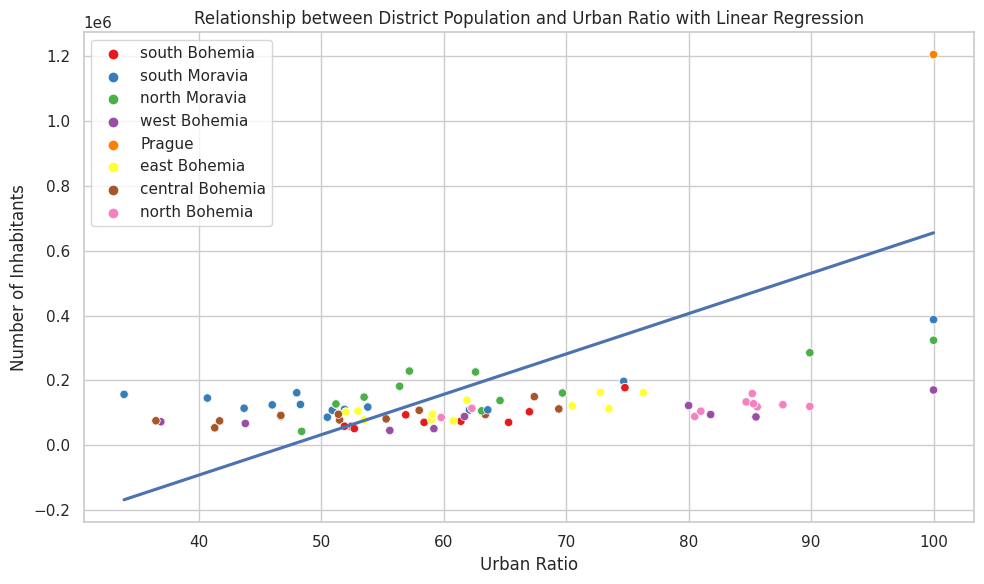

In [15]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Set style
sns.set(style="whitegrid")

# Create a scatter plot
scatter_plot = sns.scatterplot(x='urban_ratio', y='no_inhabitans', data=behavior_data, hue='region', palette='Set1')

# Add linear regression line
sns.regplot(x='urban_ratio', y='no_inhabitans', data=behavior_data, scatter=False, ax=scatter_plot)

# Customize the plot
plt.title('Relationship between District Population and Urban Ratio with Linear Regression')
plt.xlabel('Urban Ratio')
plt.ylabel('Number of Inhabitants')

# Adjust layout
plt.tight_layout()

# Show legend
plt.legend()

# Display the plot
plt.show()

The data indicates a positive linear relationship between the "number of inhabitants" and the "urban ratio." As the "number of inhabitants" increases, the "urban ratio" also tends to increase, suggesting that larger populations are associated with higher levels of urbanization.

### 4. **Gender Analysis:**
   - Explore the relationship between amount spending and balance amount in gender characteristics for banking activities.

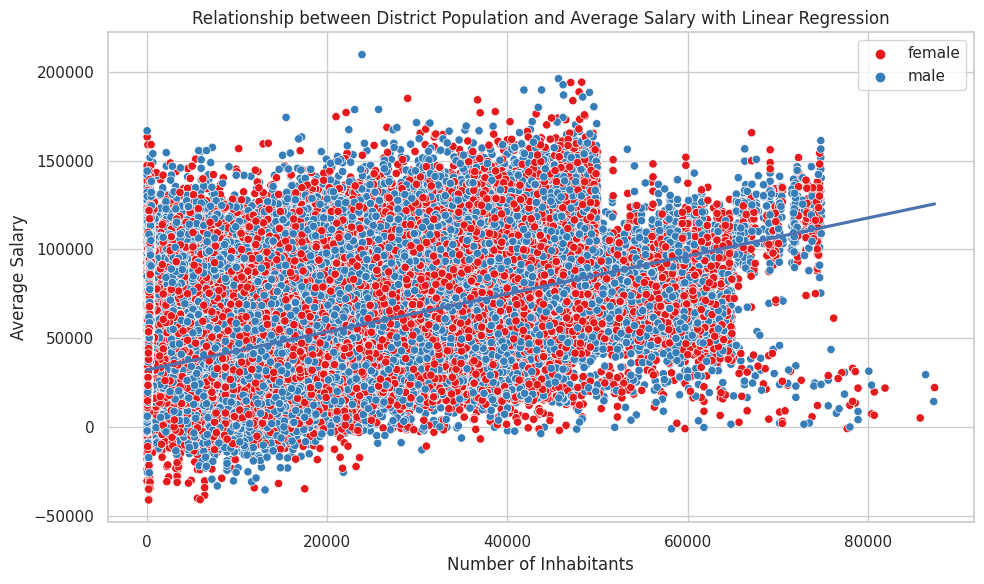

In [16]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Set style
sns.set(style="whitegrid")

# Create a scatter plot
scatter_plot = sns.scatterplot(x='amount', y='balance', data=behavior_data, hue='gender', palette='Set1')

# Add linear regression line
sns.regplot(x='amount', y='balance', data=behavior_data, scatter=False, ax=scatter_plot)

# Customize the plot
plt.title('Relationship between District Population and Average Salary with Linear Regression')
plt.xlabel('Number of Inhabitants')
plt.ylabel('Average Salary')

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()

The data reveals a positive linear relationship between "average salary" and the "number of inhabitants." As the "number of inhabitants" increases, the "average salary" also tends to increase, indicating a correlation between population size and income levels.

Furthermore, the data demonstrates a balanced distribution of gender among the sample. This suggests that the representation of genders is relatively equal within the dataset, indicating a fair and even inclusion of both genders

### **5. Time Series Analysis:**
- Analyze transaction trends over time to identify peak transaction periods.
- Investigate any seasonality in transaction frequencies or amounts.

In [17]:
# Convert the 'date' column to datetime format
behavior_data['date'] = pd.to_datetime(behavior_data['date'])

# Extract year and month from the 'date' column
behavior_data['year'] = behavior_data['date'].dt.year
behavior_data['month'] = behavior_data['date'].dt.month

# Group the data by year and month and count occurrences
transaction_counts = behavior_data.groupby(['year', 'month']).size().reset_index(name='transaction_count')

# Create the interactive line plot
fig = px.line(
    transaction_counts,
    x='month',
    y='transaction_count',
    color='year',
    labels={'month': 'Month', 'transaction_count': 'Transaction Count'},
    title='Transaction Trends Over Time',
    category_orders={'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
)

# Customize the plot layout
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
    legend_title_text='Year',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
)

# Show the interactive plot
fig.show()

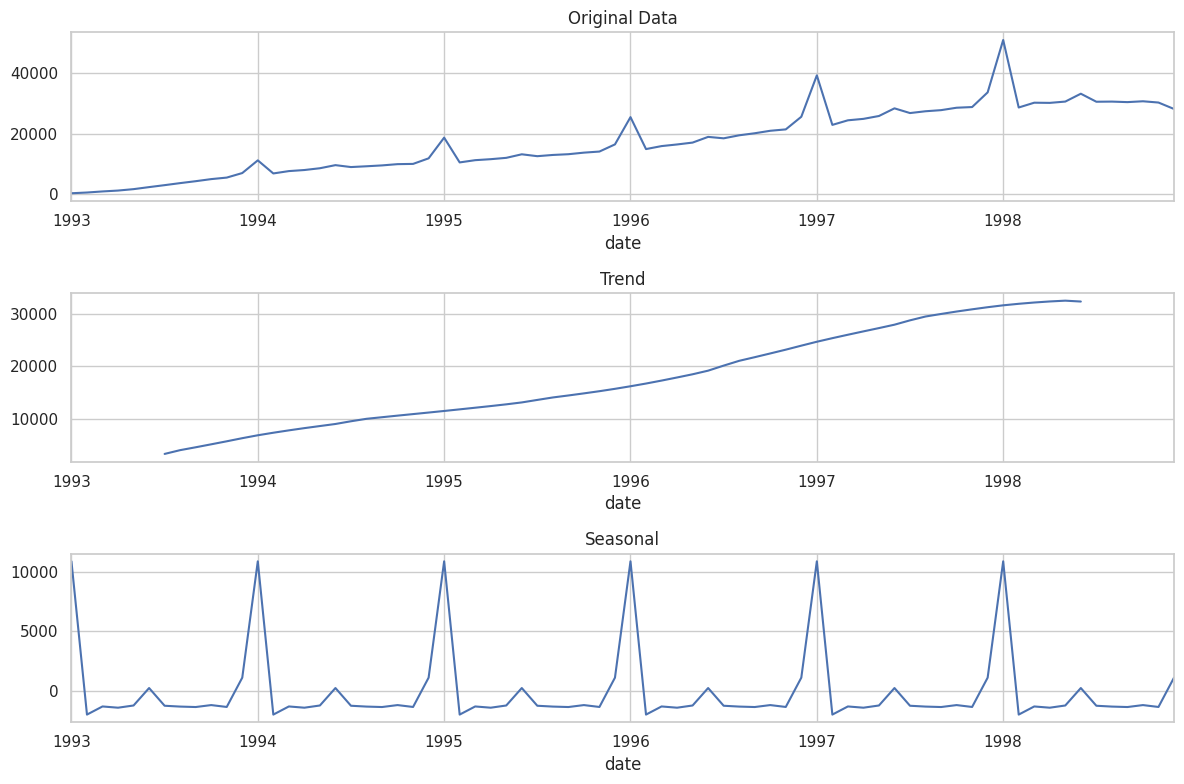

In [18]:
# Convert the 'date' column to datetime format
behavior_data['date'] = pd.to_datetime(behavior_data['date'])

# Set 'date' as the index
behavior_data.set_index('date', inplace=True)

# Resample the data by month and calculate transaction count and amount sum
monthly_data = behavior_data.resample('M').agg({'trans_id': 'count', 'amount': 'sum'})

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(monthly_data['trans_id'], model='additive', period=12)

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

# Plot the original data, trend, seasonal, and residual components
monthly_data['trans_id'].plot(ax=axes[0], title='Original Data')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')

# Customize plot layout
plt.tight_layout()

# Show the plots
plt.show()

1. Time Series Trend:
 - The data spans across multiple months, starting from January 1993 to March 1994.
The "amount" of transactions appears to exhibit fluctuations over this time period.

2. Increasing Transaction Volume:
 - There is a general trend of increasing "trans_id" values, indicating a growing number of transactions over time.

3. Fluctuating Transaction Amounts:
 - The "amount" of transactions shows variations from month to, as we can see the patterns of December have higher transaction amounts, while others have relatively lower amounts. this indicate some transaction fluctution each December considering of Vacation or end of year Sales

## EDA Conclusion

1. Customer Behavior Analysis Result:
 - DISPONENT customers prefer debit card transactions, while OWNER customers use a more balanced mix of credit and debit cards.
 - Spending amounts and account balances vary across regions, with "central Bohemia" and "south Bohemia" showing higher spending.
 - "Prague" demonstrates balanced spending and account balances, while "west Bohemia" displays lower spending.
 - These insights suggest diverse financial behaviors and preferences among regions.

2. Credit Risk Assessment Result:
 - Some regions lack credit utilization data, limiting a comprehensive overview.
 - Available data indicates higher credit utilization in "south Bohemia."
 - No consistent trend between unemployment rates and default rates was observed.
 - Missing data underscores limitations in assessing unemployment's direct impact on default rates.

3. Geographic Analysis Result:
 - Positive linear relationship between "number of inhabitants" and "urban ratio."
Suggests that larger populations correspond to higher urbanization levels.

4. Gender Analysis Result:
 - Positive correlation between "average salary" and "number of inhabitants."
Indicates that population size is associated with higher income levels.
Dataset demonstrates a balanced gender distribution, ensuring equal representation.

5. Time Series Analysis Result:
 - Increasing transaction volume observed over the analyzed time span.
Fluctuations in transaction amounts, with December showing higher activity.
Suggests potential seasonality or holiday-related spending patterns.

Conclusion:
These analyses provided valuable insights into customer behaviors, credit risk, geographic trends, gender dynamics, and temporal patterns within the banking dataset. The results underscore the importance of understanding demographic characteristics and their influence on financial activities, highlighting potential opportunities for tailored services and risk assessment. Further exploration and consideration of these insights could lead to informed decision-making and enhanced customer experiences in the banking sector.






# DATA PREPROCESSING

In [19]:
df_trans.head()

trans_id  account_id    date    type operation  amount  balance k_symbol  \
0    695247        2378  930101  PRIJEM     VKLAD   700.0    700.0      NaN   
1    171812         576  930101  PRIJEM     VKLAD   900.0    900.0      NaN   
2    207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0      NaN   
3   1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0      NaN   
4    579373        1972  930102  PRIJEM     VKLAD   400.0    400.0      NaN   

  bank  account  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN

### Feature Modification

In [20]:
# Convert 'date' column to datetime format
df_trans['date'] = pd.to_datetime(df_trans['date'], format='%y%m%d')
# Extract year and month from the 'date' column
df_trans['year'] = df_trans['date'].dt.year
df_trans

trans_id  account_id       date    type operation  amount  balance  \
0          695247        2378 1993-01-01  PRIJEM     VKLAD   700.0    700.0   
1          171812         576 1993-01-01  PRIJEM     VKLAD   900.0    900.0   
2          207264         704 1993-01-01  PRIJEM     VKLAD  1000.0   1000.0   
3         1117247        3818 1993-01-01  PRIJEM     VKLAD   600.0    600.0   
4          579373        1972 1993-01-02  PRIJEM     VKLAD   400.0    400.0   
...           ...         ...        ...     ...       ...     ...      ...   
1056315   3626622        2906 1998-12-31  PRIJEM       NaN    62.3  13729.4   
1056316   3627616        2935 1998-12-31  PRIJEM       NaN    81.3  19544.9   
1056317   3625403        2869 1998-12-31  PRIJEM       NaN    60.2  14638.2   
1056318   3626683        2907 1998-12-31  PRIJEM       NaN   107.5  23453.0   
1056319   3626540        2902 1998-12-31  PRIJEM       NaN   164.1  41642.9   

        k_symbol bank  account  year  
0            NaN  NaN      NaN  1993  
1            NaN  NaN      NaN  1993  
2            NaN  NaN      NaN  1993  
3            NaN  NaN      NaN  1993  
4            NaN  NaN      NaN  1993  
...          ...  ...      ...   ...  
1056315     UROK  NaN      NaN  1998  
1056316     UROK  NaN      NaN  1998  
1056317     UROK  NaN      NaN  1998  
1056318     UROK  NaN      NaN  1998  
1056319     UROK  NaN      NaN  1998  

[1056320 rows x 11 columns]

for the purpose of clustering models, data used will be the most updated transaction which is from 1997 until the end of data which is 1998

In [21]:
# Filter the DataFrame to include data from the year 1997 and onwards
df_trans = df_trans[df_trans['year'] >= 1997]

# Display the filtered DataFrame
df_trans

trans_id  account_id       date    type operation  amount   balance  \
449634     733170        2505 1997-01-01   VYDAJ     VYBER  2240.0   22026.9   
449635     730220        2496 1997-01-01   VYDAJ     VYBER   600.0   17459.7   
449636     801150        2732 1997-01-01   VYDAJ     VYBER  2400.0  103486.4   
449637     801631        2733 1997-01-01   VYDAJ     VYBER   360.0   31725.6   
449638     804173        2740 1997-01-01   VYDAJ     VYBER  2200.0   16872.0   
...           ...         ...        ...     ...       ...     ...       ...   
1056315   3626622        2906 1998-12-31  PRIJEM       NaN    62.3   13729.4   
1056316   3627616        2935 1998-12-31  PRIJEM       NaN    81.3   19544.9   
1056317   3625403        2869 1998-12-31  PRIJEM       NaN    60.2   14638.2   
1056318   3626683        2907 1998-12-31  PRIJEM       NaN   107.5   23453.0   
1056319   3626540        2902 1998-12-31  PRIJEM       NaN   164.1   41642.9   

        k_symbol bank  account  year  
449634       NaN  NaN      NaN  1997  
449635       NaN  NaN      NaN  1997  
449636       NaN  NaN      NaN  1997  
449637       NaN  NaN      NaN  1997  
449638       NaN  NaN      NaN  1997  
...          ...  ...      ...   ...  
1056315     UROK  NaN      NaN  1998  
1056316     UROK  NaN      NaN  1998  
1056317     UROK  NaN      NaN  1998  
1056318     UROK  NaN      NaN  1998  
1056319     UROK  NaN      NaN  1998  

[606686 rows x 11 columns]

creating a summary DataFrame that shows the count of transactions for each unique account

In [22]:
# Create a reference DataFrame with all possible combinations of 'account_id'
all_combinations = pd.MultiIndex.from_product([df_trans['account_id'].unique()],  # Unique account IDs
                                             names=['account_id'])

# Create the reference DataFrame
reference_df = pd.DataFrame(index=all_combinations).reset_index()

# Merge the reference DataFrame with the actual transaction counts
number_trans = reference_df.merge(behavior_data.groupby(['account_id']).size().reset_index(name='transaction_count'),
                                  how='left',
                                  on=['account_id'])

# Fill missing transaction counts with 0
number_trans['transaction_count'].fillna(0, inplace=True)
number_trans

account_id  transaction_count
0           2505                340
1           2496                634
2           2732                387
3           2733                344
4           2740                265
...          ...                ...
4492        3958                 94
4493         777                 79
4494        3276                138
4495        1573                 48
4496         138                 48

[4497 rows x 2 columns]

The following code aims to summarize the transaction behavior of different accounts by categorizing and counting the occurrences of different transaction types.

In [23]:
# Group by 'account_id' and 'type', then count the occurrences
result = behavior_data.groupby(['account_id', 'type']).size().reset_index(name='count')

# Pivot the result to have 'type' as columns and 'account_id' as rows
type_result = result.pivot_table(index='account_id', columns='type', values='count', fill_value=0)

# Reset the index to have a clean DataFrame
type_result.reset_index(inplace=True)
type_result

type  account_id  Trans Withdrawal  Trans_Credit  Trans_Debit
0              1                 0           102          137
1              2                42           304          610
2              3                 0            92          142
3              4                 0            65          121
4              5                 0            35           49
...          ...               ...           ...          ...
4495       11333                29           183          156
4496       11349                40           182          386
4497       11359                 3           104          271
4498       11362                 0            81          263
4499       11382                15           121          117

[4500 rows x 4 columns]

The following code aims to summarize the transaction behavior of different accounts by categorizing and counting the occurrences of different operation types.

In [24]:
# Group by 'account_id' and 'operation', then count the occurrences
result = behavior_data.groupby(['account_id', 'operation']).size().reset_index(name='count')

# Pivot the result to have 'operation' as columns and 'account_id' as rows
operation_result = result.pivot_table(index='account_id', columns='operation', values='count', fill_value=0)

# Reset the index to have a clean DataFrame
operation_result.reset_index(inplace=True)
operation_result

operation  account_id  Collection From Other Bank  Credit Card Withdrawal  \
0                   1                          45                       0   
1                   2                         140                       0   
2                   3                           0                       0   
3                   4                          34                       0   
4                   5                          19                       0   
...               ...                         ...                     ...   
4495            11333                           0                       0   
4496            11349                          86                       0   
4497            11359                          51                      22   
4498            11362                           0                       0   
4499            11382                          40                       0   

operation  Credit in Cash  Interest  Remittance From Other Bank  \
0                      12        45                          40   
1                      24       140                         178   
2                      56        36                          78   
3                       1        30                          59   
4                       1        15                          14   
...                   ...       ...                         ...   
4495                   78       105                           0   
4496                   10        86                         154   
4497                    2        51                         104   
4498                   43        38                         160   
4499                    1        80                           0   

operation  Trans Withdrawal  
0                        97  
1                       474  
2                        64  
3                        62  
4                        35  
...                     ...  
4495                    185  
4496                    272  
4497                    148  
4498                    103  
4499                    132  

[4500 rows x 7 columns]

The following code aims to provide insights into different financial transactions based on the 'k_symbol' attribute. By summarizing the occurrences of different 'k_symbol' values for each account

In [25]:
# Group by 'account_id' and 'k_symbol', then count the occurrences
result = behavior_data.groupby(['account_id', 'k_symbol']).size().reset_index(name='count')

# Pivot the result to have 'k_symbol' as columns and 'account_id' as rows
kSymbol_result = result.pivot_table(index='account_id', columns='k_symbol', values='count', fill_value=0)

# Reset the index to have a clean DataFrame
kSymbol_result.reset_index(inplace=True)
kSymbol_result

k_symbol  account_id      Household Payment  Insurance Payment  \
0                  1   0                 40                  0   
1                  2   0                130                  0   
2                  3  26                 26                 26   
3                  4  30                 29                  0   
4                  5   0                 14                  0   
...              ...  ..                ...                ...   
4495           11333   0                  0                  0   
4496           11349   0                 78                  0   
4497           11359  46                 46                  0   
4498           11362  68                 34                 34   
4499           11382   0                  0                  0   

k_symbol  Interest Credit  Loan Payment  Old age Pension Payment  \
0                      45             0                        0   
1                     140            48                        0   
2                      36             0                        0   
3                      30             0                       34   
4                      15             0                       19   
...                   ...           ...                      ...   
4495                  105             0                        0   
4496                   86            76                        0   
4497                   51            12                        0   
4498                   38            24                        0   
4499                   80             0                        0   

k_symbol  Payment of Statement  Sanction Negative Bal.  Standard Payment  
0                           40                       0               114  
1                          130                       0               508  
2                           26                       0                94  
3                           29                       0                34  
4                           14                       0                22  
...                        ...                     ...               ...  
4495                        52                      13               198  
4496                        76                       0               292  
4497                        46                       0               177  
4498                        33                       0               113  
4499                        35                       8               130  

[4500 rows x 10 columns]

The following code is aimed at summarizing financial data by grouping it based on different attributes 'account_id'. By applying specified aggregation methods, this code helps provide insights into the total amounts and balances of financial transactions for each account

In [26]:
# Group by 'account_id' then apply desired aggregation methods
grouped = behavior_data.groupby(['account_id']).agg(
    total_amount=pd.NamedAgg(column='amount', aggfunc='sum'),
    total_balance=pd.NamedAgg(column='balance', aggfunc='sum'),
    ).reset_index()
grouped

account_id  total_amount  total_balance
0              1      375174.5      3822568.0
1              2     6302958.6     34932913.4
2              3      590043.6      6311800.6
3              4      350971.4      4046141.0
4              5      166881.4      2107565.8
...          ...           ...            ...
4495       11333     3295795.5     17039965.5
4496       11349     7914744.4     29651823.8
4497       11359     2948081.4     13647981.8
4498       11362     1330010.5     10481659.5
4499       11382     2623161.9      9204071.3

[4500 rows x 3 columns]

The following code is designed to combine and merge multiple DataFrames in order to create a comprehensive summary of financial data with various attributes. This consolidated DataFrame, df_trans, contains aggregated information about customer behavior, transaction types, operations, and payment categories.

In [27]:
df_trans = grouped.merge(number_trans, on=['account_id'], how='inner')
df_trans = df_trans.merge(type_result, on=['account_id'], how='inner')
df_trans = df_trans.merge(operation_result, on=['account_id'], how='inner')
df_trans = df_trans.merge(kSymbol_result[['account_id','Household Payment', 'Insurance Payment', 'Interest Credit',
                                          'Loan Payment', 'Old age Pension Payment', 'Payment of Statement','Sanction Negative Bal.','Standard Payment']],
    on=['account_id'],
    how='inner'
)
df_trans

account_id  total_amount  total_balance  transaction_count  \
0              1      375174.5      3822568.0                239   
1              2     6302958.6     34932913.4                956   
2              3      590043.6      6311800.6                234   
3              4      350971.4      4046141.0                186   
4              5      166881.4      2107565.8                 84   
...          ...           ...            ...                ...   
4492       11333     3295795.5     17039965.5                368   
4493       11349     7914744.4     29651823.8                608   
4494       11359     2948081.4     13647981.8                378   
4495       11362     1330010.5     10481659.5                344   
4496       11382     2623161.9      9204071.3                253   

      Trans Withdrawal_x  Trans_Credit  Trans_Debit  \
0                      0           102          137   
1                     42           304          610   
2                      0            92          142   
3                      0            65          121   
4                      0            35           49   
...                  ...           ...          ...   
4492                  29           183          156   
4493                  40           182          386   
4494                   3           104          271   
4495                   0            81          263   
4496                  15           121          117   

      Collection From Other Bank  Credit Card Withdrawal  Credit in Cash  ...  \
0                             45                       0              12  ...   
1                            140                       0              24  ...   
2                              0                       0              56  ...   
3                             34                       0               1  ...   
4                             19                       0               1  ...   
...                          ...                     ...             ...  ...   
4492                           0                       0              78  ...   
4493                          86                       0              10  ...   
4494                          51                      22               2  ...   
4495                           0                       0              43  ...   
4496                          40                       0               1  ...   

      Remittance From Other Bank  Trans Withdrawal_y  Household Payment  \
0                             40                  97                 40   
1                            178                 474                130   
2                             78                  64                 26   
3                             59                  62                 29   
4                             14                  35                 14   
...                          ...                 ...                ...   
4492                           0                 185                  0   
4493                         154                 272                 78   
4494                         104                 148                 46   
4495                         160                 103                 34   
4496                           0                 132                  0   

      Insurance Payment  Interest Credit  Loan Payment  \
0                     0               45             0   
1                     0              140            48   
2                    26               36             0   
3                     0               30             0   
4                     0               15             0   
...                 ...              ...           ...   
4492                  0              105             0   
4493                  0               86            76   
4494                  0               51            12   
4495                 34               38            24   
4496            

## Feature Information Final

provides essential information about the structure and content of the DataFrame df_trans.

In [28]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4497 entries, 0 to 4496
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_id                  4497 non-null   int64  
 1   total_amount                4497 non-null   float64
 2   total_balance               4497 non-null   float64
 3   transaction_count           4497 non-null   int64  
 4   Trans Withdrawal_x          4497 non-null   int64  
 5   Trans_Credit                4497 non-null   int64  
 6   Trans_Debit                 4497 non-null   int64  
 7   Collection From Other Bank  4497 non-null   int64  
 8   Credit Card Withdrawal      4497 non-null   int64  
 9   Credit in Cash              4497 non-null   int64  
 10  Interest                    4497 non-null   int64  
 11  Remittance From Other Bank  4497 non-null   int64  
 12  Trans Withdrawal_y          4497 non-null   int64  
 13  Household Payment           4497 

 calculate the count of missing values in each column of the DataFrame df_trans.

In [29]:
df_trans.isnull().sum()

account_id                    0
total_amount                  0
total_balance                 0
transaction_count             0
Trans Withdrawal_x            0
Trans_Credit                  0
Trans_Debit                   0
Collection From Other Bank    0
Credit Card Withdrawal        0
Credit in Cash                0
Interest                      0
Remittance From Other Bank    0
Trans Withdrawal_y            0
Household Payment             0
Insurance Payment             0
Interest Credit               0
Loan Payment                  0
Old age Pension Payment       0
Payment of Statement          0
Sanction Negative Bal.        0
Standard Payment              0
dtype: int64

Next following step is create duplicate dataframe as "df_trans_processing"to hel model inference

## Preprocessing

In [30]:
df_trans_processing= df_trans.copy()

remove the column named 'account_id' from the DataFrame df_trans due to less contribution for data modeling

In [31]:
df_trans_processing = df_trans_processing.drop(['account_id'],axis=1)

The following code generates a correlation heatmap using the Seaborn library to visualize the correlation between different variables in the DataFrame df_trans. The heatmap is a graphical representation of the correlation matrix, where each cell's color intensity represents the strength of the correlation between two variables.

#### Feature Correlation

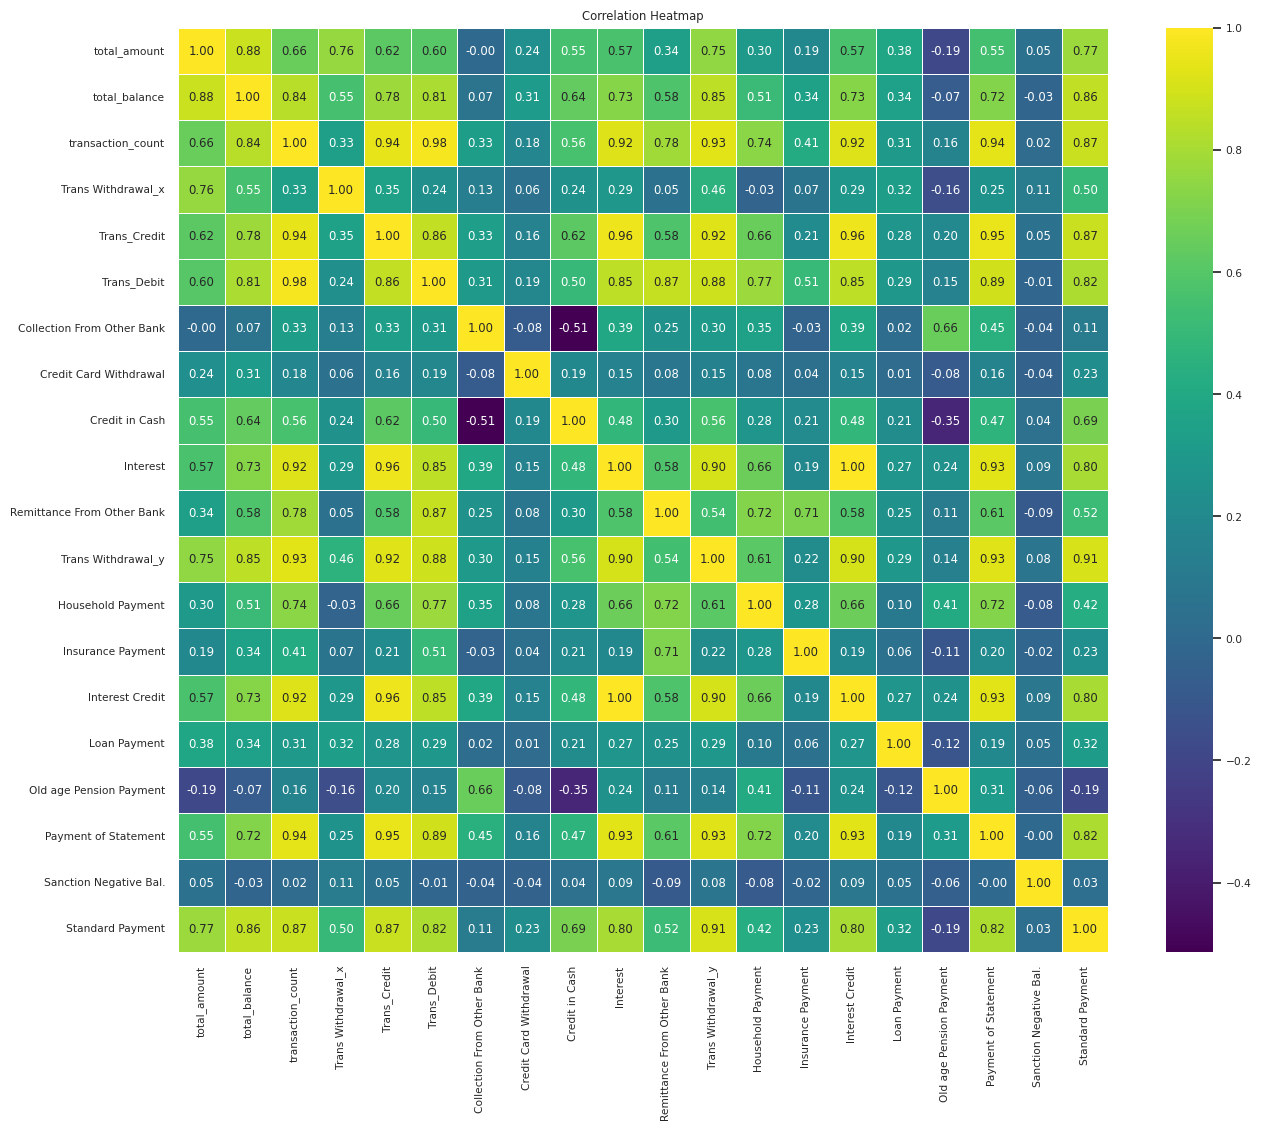

In [32]:
plt.figure(figsize=(15, 12))

# Calculate the correlation matrix
corr = df_trans_processing.corr()

# Create a heatmap with better visualization
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

- The correlation values are presented in a matrix format, where each row and column represents a variable (feature) in the DataFrame.
- Correlation coefficients closer to 1 indicate a stronger positive linear relationship between variables, while coefficients closer to -1 indicate a stronger negative linear relationship.
- Variables with higher positive correlations (values closer to 1) suggest that as one variable increases, the other tends to increase as well. Conversely, variables with higher negative correlations (values closer to -1) suggest that as one variable increases, the other tends to decrease.
- Variables with correlation coefficients close to 0 indicate a weak or no linear relationship between them.

In [33]:
# collecting the list of df_trans column
num_col = df_trans_processing.columns

### Feature Outliers Overviews

The following code generates a grid of histograms to visually analyze the distribution and skewness of numerical columns in the DataFrame

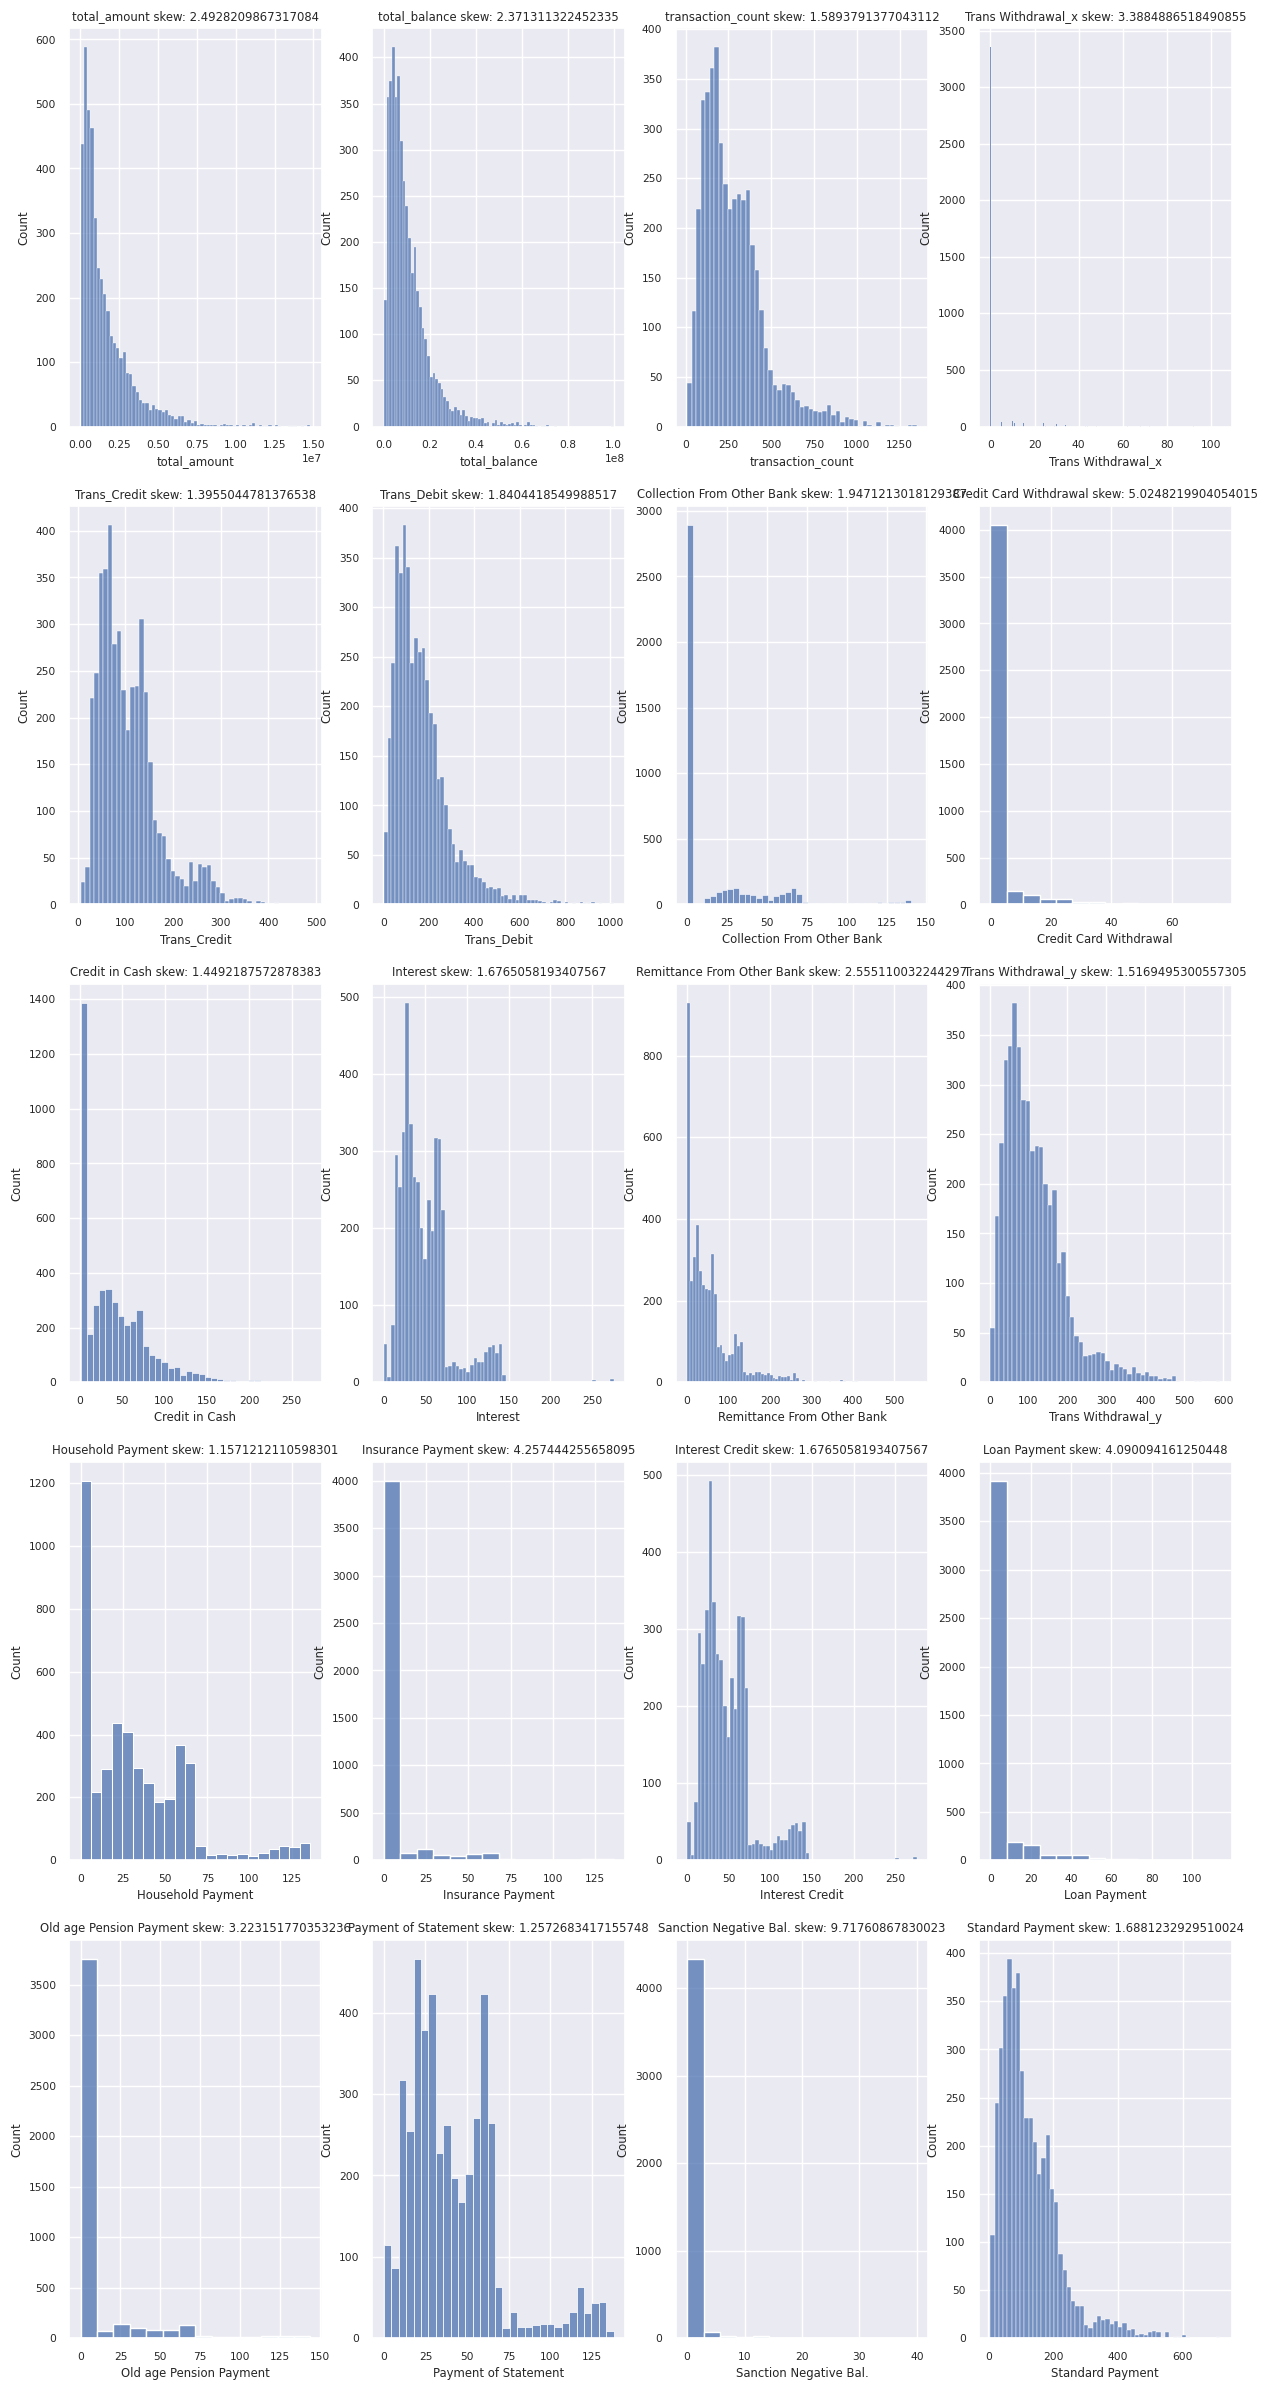

In [34]:
# ploting numerical columns to find skewness
fig, ax = plt.subplots(nrows=5,ncols=4, figsize=[15,30])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.histplot(df_trans_processing[col], ax=ax[idx])
    ax[idx].set_title(f'{num_col[idx]} skew: {df_trans_processing[col].skew()}')

In [35]:
# define function for printing skewness
def print_skew(data,columns):
  for col in columns:
    if -0.5 <= data[col].skew() <= 0.5:
      print(f'Column {col} :{data[col].skew()} is normal distribution')
    elif data[col].skew() > 0.5:
      print(f'Column {col} :{data[col].skew()} right skewed')
    elif data[col].skew() < -0.5:
      print(f'Column {col} :{data[col].skew()} left skewed')

In [36]:
print_skew(df_trans_processing,num_col)

Column total_amount :2.4928209867317084 right skewed
Column total_balance :2.371311322452335 right skewed
Column transaction_count :1.5893791377043112 right skewed
Column Trans Withdrawal_x :3.3884886518490855 right skewed
Column Trans_Credit :1.3955044781376538 right skewed
Column Trans_Debit :1.8404418549988517 right skewed
Column Collection From Other Bank :1.9471213018129387 right skewed
Column Credit Card Withdrawal :5.0248219904054015 right skewed
Column Credit in Cash :1.4492187572878383 right skewed
Column Interest :1.6765058193407567 right skewed
Column Remittance From Other Bank :2.555110032244297 right skewed
Column Trans Withdrawal_y :1.5169495300557305 right skewed
Column Household Payment :1.1571212110598301 right skewed
Column Insurance Payment :4.257444255658095 right skewed
Column Interest Credit :1.6765058193407567 right skewed
Column Loan Payment :4.090094161250448 right skewed
Column Old age Pension Payment :3.223151770353236 right skewed
Column Payment of Statement

The skewness analysis highlights varying transaction patterns across different types. Accounts with high positive skewness values indicate potential outliers or unique behaviors. It's essential to consider these findings when analyzing the data, as they could help identify specific customer preferences or financial activities that stand out from the overall trend.

The following syntax is to put Correlation Threshold, correlation threshold acts as a criterion for identifying highly correlated features. In this case, a threshold of 0.7 is set, meaning that features with an absolute correlation coefficient greater than 0.7 (positively or negatively) will be considered highly correlated.

### Feature Selection

In [37]:
# Calculate correlation matrix
correlation_matrix = df_trans_processing.corr()

# Set correlation threshold
correlation_threshold = 0.7

# Get the names of features highly correlated with 'total_balance'
highly_correlated_balance = correlation_matrix[abs(correlation_matrix['total_balance']) > correlation_threshold].index.tolist()

# Get the names of features highly correlated with 'total_amount'
highly_correlated_amount = correlation_matrix[abs(correlation_matrix['total_amount']) > correlation_threshold].index.tolist()

highly_correlated_features = list(set(highly_correlated_balance + highly_correlated_amount))
correlation_matrix_highly_correlated = df_trans_processing[highly_correlated_features].corr()

result feature with highly correlated with threshol 0.7

In [38]:
correlation_matrix_highly_correlated

Trans Withdrawal_x  Interest  Trans_Debit  total_amount  \
Trans Withdrawal_x              1.000000  0.288847     0.238045      0.759606   
Interest                        0.288847  1.000000     0.851957      0.565444   
Trans_Debit                     0.238045  0.851957     1.000000      0.598775   
total_amount                    0.759606  0.565444     0.598775      1.000000   
Trans Withdrawal_y              0.458182  0.899526     0.882748      0.750268   
total_balance                   0.551385  0.727226     0.809212      0.877874   
Payment of Statement            0.251743  0.934488     0.891326      0.547226   
Interest Credit                 0.288847  1.000000     0.851957      0.565444   
Standard Payment                0.499759  0.802485     0.815557      0.772096   
transaction_count               0.334780  0.917647     0.980358      0.655036   
Trans_Credit                    0.350512  0.959565     0.863393      0.616674   

                      Trans Withdrawal_y  total_balance  Payment of Statement  \
Trans Withdrawal_x              0.458182       0.551385              0.251743   
Interest                        0.899526       0.727226              0.934488   
Trans_Debit                     0.882748       0.809212              0.891326   
total_amount                    0.750268       0.877874              0.547226   
Trans Withdrawal_y              1.000000       0.848503              0.926468   
total_balance                   0.848503       1.000000              0.721705   
Payment of Statement            0.926468       0.721705              1.000000   
Interest Credit                 0.899526       0.727226              0.934488   
Standard Payment                0.910934       0.856556              0.816002   
transaction_count               0.934740       0.840297              0.938553   
Trans_Credit                    0.923172       0.778038              0.949850   

                      Interest Credit  Standard Payment  transaction_count  \
Trans Withdrawal_x           0.288847          0.499759           0.334780   
Interest                     1.000000          0.802485           0.917647   
Trans_Debit                  0.851957          0.815557           0.980358   
total_amount                 0.565444          0.772096           0.655036   
Trans Withdrawal_y           0.899526          0.910934           0.934740   
total_balance                0.727226          0.856556           0.840297   
Payment of Statement         0.934488          0.816002           0.938553   
Interest Credit              1.000000          0.802485           0.917647   
Standard Payment             0.802485          1.000000           0.874057   
transaction_count            0.917647          0.874057           1.000000   
Trans_Credit                 0.959565          0.871126           0.942661   

                      Trans_Credit  
Trans Withdrawal_x        0.350512  
Interest                  0.959565  
Trans_Debit               0.863393  
total_amount              0.616674  
Trans Withdrawal_y        0.923172  
total_balance             0.778038  
Payment of Statement      0.949850  
Interest Credit           0.959565  
Standard Payment          0.871126  
transaction_count         0.942661  
Trans_Credit              1.000000

list of feature

In [39]:
selected_features = correlation_matrix_highly_correlated.columns
selected_features

Index(['Trans Withdrawal_x', 'Interest', 'Trans_Debit', 'total_amount',
       'Trans Withdrawal_y', 'total_balance', 'Payment of Statement',
       'Interest Credit', 'Standard Payment', 'transaction_count',
       'Trans_Credit'],
      dtype='object')

### Numeric Scaling

The following code is to process scaling features using the StandardScaler from the scikit-learn library. It's intended to prepare data for clustering or other machine learning tasks. The used of StandardScaler due data contain outliers which StandardScaler is more robust with outliers

In [40]:
from sklearn.preprocessing import StandardScaler

# Create an instance of MinMaxScaler
scaler = StandardScaler()

# Define the features you want to scale (assuming 'data' is your feature matrix)
features_to_scale = selected_features

# Fit and transform the selected features using MinMaxScaler
scaled_features = scaler.fit_transform(df_trans_processing[features_to_scale])

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Now 'scaled_df' contains the scaled features that you can use for clustering
scaled_df

Trans Withdrawal_x  Interest  Trans_Debit  total_amount  \
0              -0.426771 -0.114599    -0.257695     -0.723560   
1               3.709628  2.958736     3.519571      2.643640   
2              -0.426771 -0.405757    -0.217766     -0.601507   
3              -0.426771 -0.599862    -0.385467     -0.737309   
4              -0.426771 -1.085125    -0.960442     -0.841878   
...                  ...       ...          ...           ...   
4492            2.429314  1.826455    -0.105965      0.935460   
4493            3.512657  1.211788     1.730760      3.559194   
4494           -0.131314  0.079507     0.812397      0.737946   
4495           -0.426771 -0.341055     0.748511     -0.181178   
4496            1.050514  1.017683    -0.417410      0.553380   

      Trans Withdrawal_y  total_balance  Payment of Statement  \
0              -0.228744      -0.721094             -0.052467   
1               4.573092       2.500101              3.184576   
2              -0.649064      -0.463357             -0.556007   
3              -0.674538      -0.697945             -0.448106   
4              -1.018436      -0.898667             -0.987613   
...                  ...            ...                   ...   
4492            0.892109       0.647448              0.379139   
4493            2.000225       1.953292              1.242350   
4494            0.420841       0.296238              0.163336   
4495           -0.152322      -0.031606             -0.304237   
4496            0.217050      -0.163888             -0.232303   

      Interest Credit  Standard Payment  transaction_count  Trans_Credit  
0           -0.114599         -0.139362          -0.222574     -0.078926  
1            2.958736          4.189234           3.600601      3.023447  
2           -0.405757         -0.359088          -0.249235     -0.232509  
3           -0.599862         -1.018265          -0.505180     -0.647182  
4           -1.085125         -1.150101          -1.049062     -1.107931  
...               ...               ...                ...           ...  
4492         1.826455          0.783485           0.465278      1.165095  
4493         1.211788          1.816196           1.745002      1.149737  
4494         0.079507          0.552774           0.518600     -0.048209  
4495        -0.341055         -0.150349           0.337305     -0.401450  
4496         1.017683          0.036418          -0.147923      0.212881  

[4497 rows x 11 columns]

create other varialble to train the model

In [41]:
X_tr = scaled_df

### PCA

The following code use of Principal Component Analysis (PCA) to reduce the dimensionality of a dataset with aiming data information is 0.9

In [42]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_tr)

##
### Elbow Method

This code "Elbow Method" is for determining the optimal number of principal components to retain in a Principal Component Analysis (PCA) process. It provides a visual representation to help understand how the explained variance changes with the number of principal components.

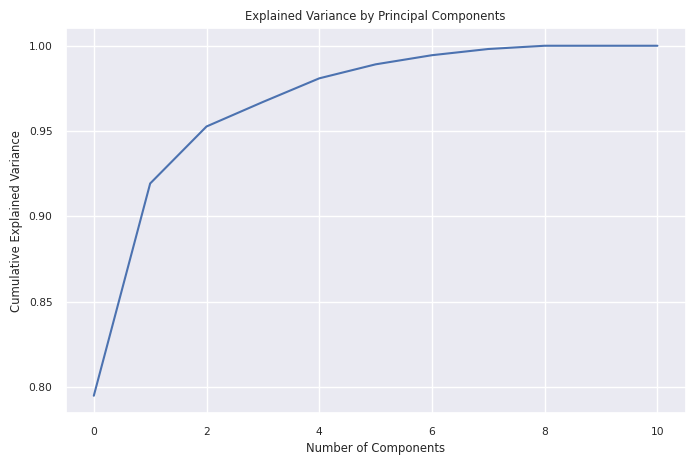

In [43]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.show()

Result from PCA inform that to get 90 % percent of data information requeired

<Axes: xlabel='0', ylabel='1'>

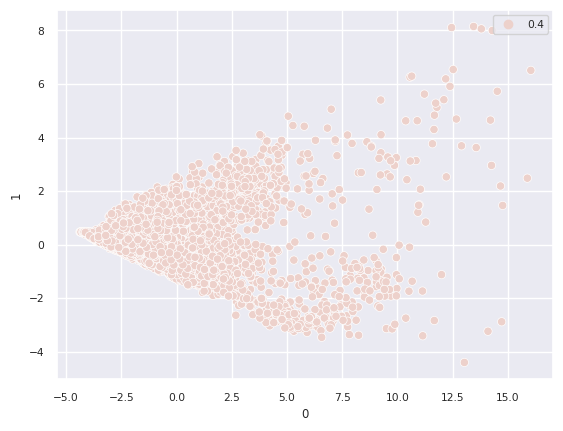

In [44]:
# for visualization, only 2 PC's saved
pca_viz = PCA(n_components=2)
X_viz = pd.DataFrame(pca_viz.fit_transform(X_pca))
sns.scatterplot(x=X_viz[0], y=X_viz[1],hue=0.4)

Above is visualization of data distribution in 2 dimensional

In [45]:
# Choose number of components to retain
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.90) + 1
print(f"Number of components to retain: {n_components}")

Number of components to retain: 2


# MODELING UNSUPERVISED

## Model Definition

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a predetermined number of distinct, non-overlapping clusters. The main goal of K-means is to group similar data points together while keeping dissimilar data points in different clusters. This algorithm is widely used for tasks such as customer segmentation, image compression, anomaly detection, and more.

Here's how the K-means algorithm works:

1. Initialization:
 - Choose the number of clusters (K) that you want to create.
Initialize K cluster centroids randomly. Each centroid represents the mean of the data points assigned to that cluster.

2. Assignment Step:
 - For each data point, calculate the distance between the point and each cluster centroid.
Assign the data point to the cluster whose centroid is the closest (usually using Euclidean distance).

3. Update Step:
 - Recalculate the centroids of the clusters based on the new assignments. The centroid is updated as the mean of all data points assigned to that cluster.

4. Repeat Steps 2 and 3:
 - Iteratively repeat the assignment and update steps until convergence.
Convergence occurs when the assignments of data points to clusters no longer change significantly, or when a predefined number of iterations is reached.

5. Result:
 - At the end of the iterations, each data point belongs to one of the K clusters.
The cluster centroids represent the centers of the clusters.

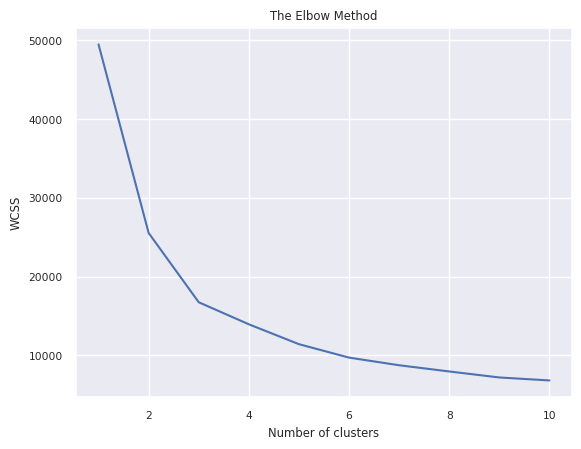

In [46]:
# Elbow method for KMeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

the result shows that the best clustering number is between 2 and 6 which the result graph is slowing at that number

## Silhoutte scoring

The silhouette score is a metric used to assess the quality of clusters formed by a clustering algorithm, such as K-means. It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). In other words, the silhouette score quantifies the compactness of data points within a cluster and the separation between different clusters.

The purpose of the silhouette score is to help determine the optimal number of clusters (K) for a given dataset or to compare the effectiveness of different clustering algorithms.

In [47]:
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

          ax1.set_title("The silhouette plot for the various clusters.")
          ax1.set_xlabel("The silhouette coefficient values")
          ax1.set_ylabel("Cluster label")

          # The vertical line for average silhouette score of all the values
          ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

          ax1.set_yticks([])  # Clear the yaxis labels / ticks
          ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

          # 2nd Plot showing the actual clusters formed
          colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
          ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                            c=colors, edgecolor='k')


          ax2.set_title("The visualization of the clustered data.")
          ax2.set_xlabel("Feature space for the 1st feature")
          ax2.set_ylabel("Feature space for the 2nd feature")
          plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                              "with n_clusters = %d" % n_clusters),
                            fontsize=14, fontweight='bold')


The following step is to scoring number cluster performance to pick the best cluster

For n_clusters = 2 The average silhouette_score is : 0.5009767208835642
For n_clusters = 3 The average silhouette_score is : 0.44950308410693707
For n_clusters = 4 The average silhouette_score is : 0.4396299767231767
For n_clusters = 5 The average silhouette_score is : 0.44436744018505114
For n_clusters = 6 The average silhouette_score is : 0.33795450698984525
For n_clusters = 7 The average silhouette_score is : 0.3356397098005068
For n_clusters = 8 The average silhouette_score is : 0.3490116630505937


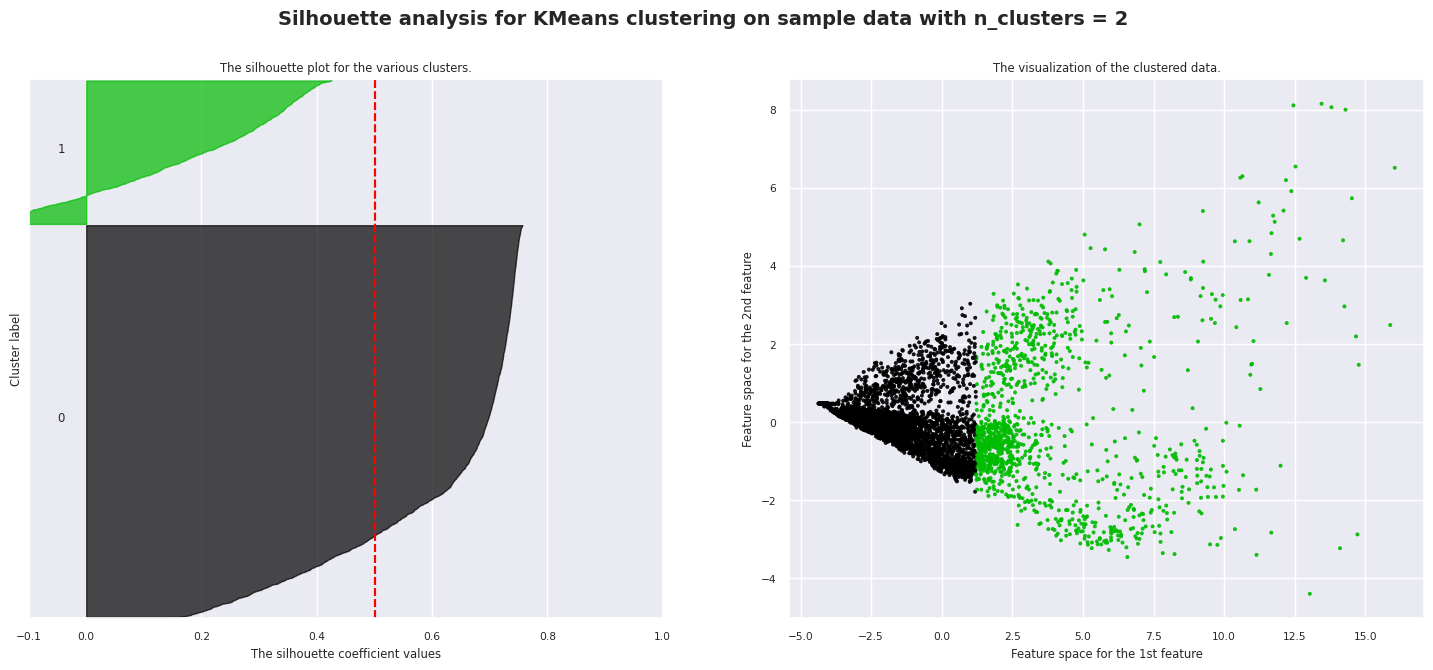

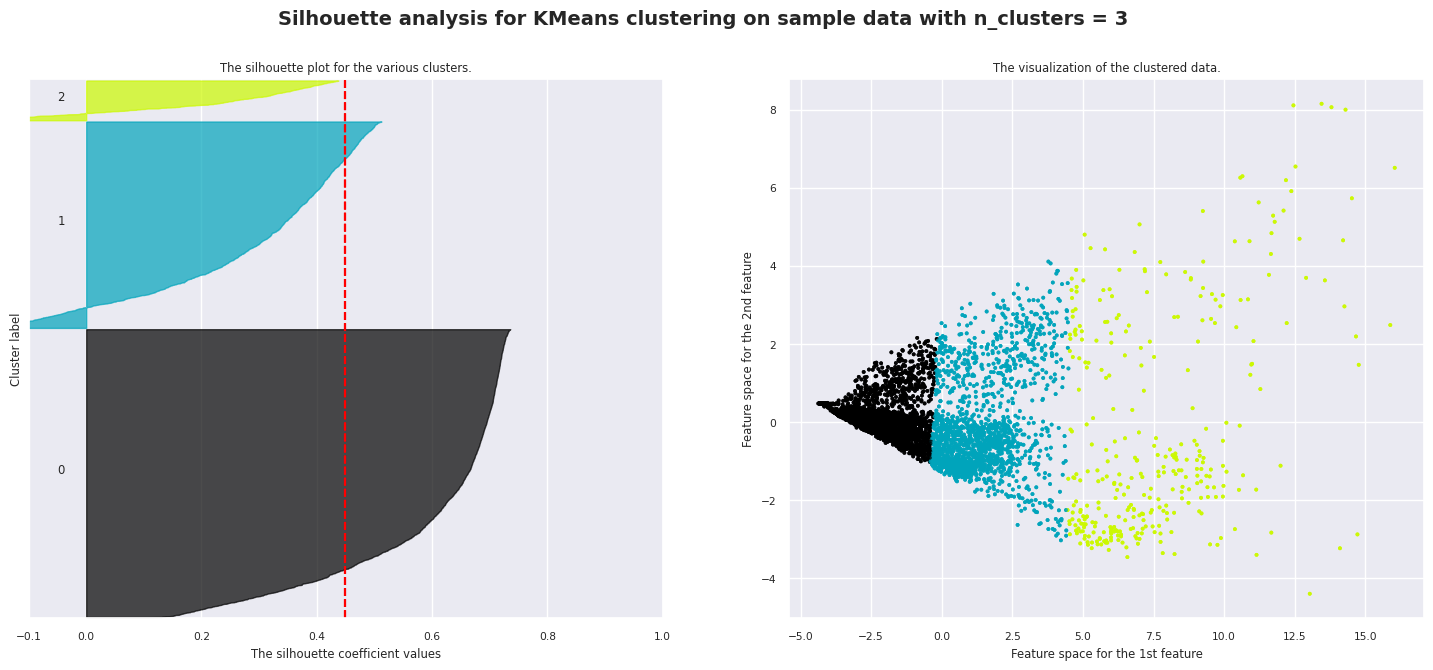

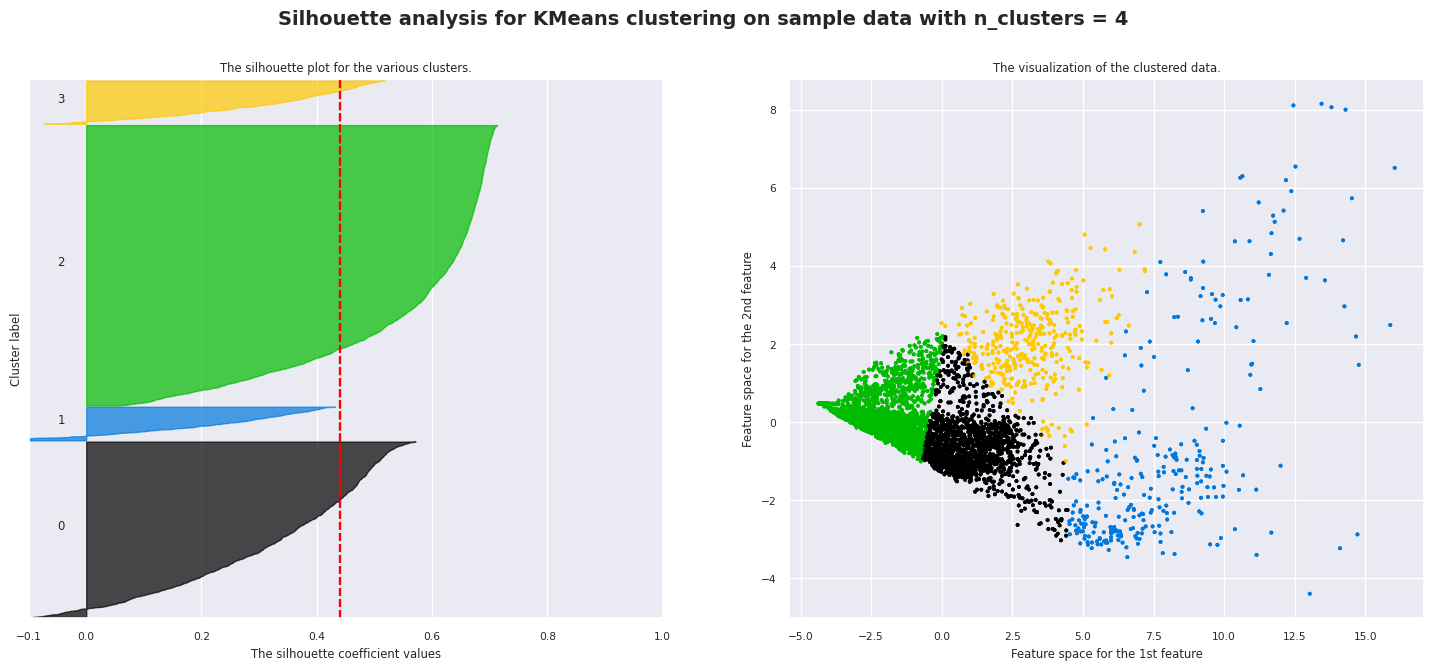

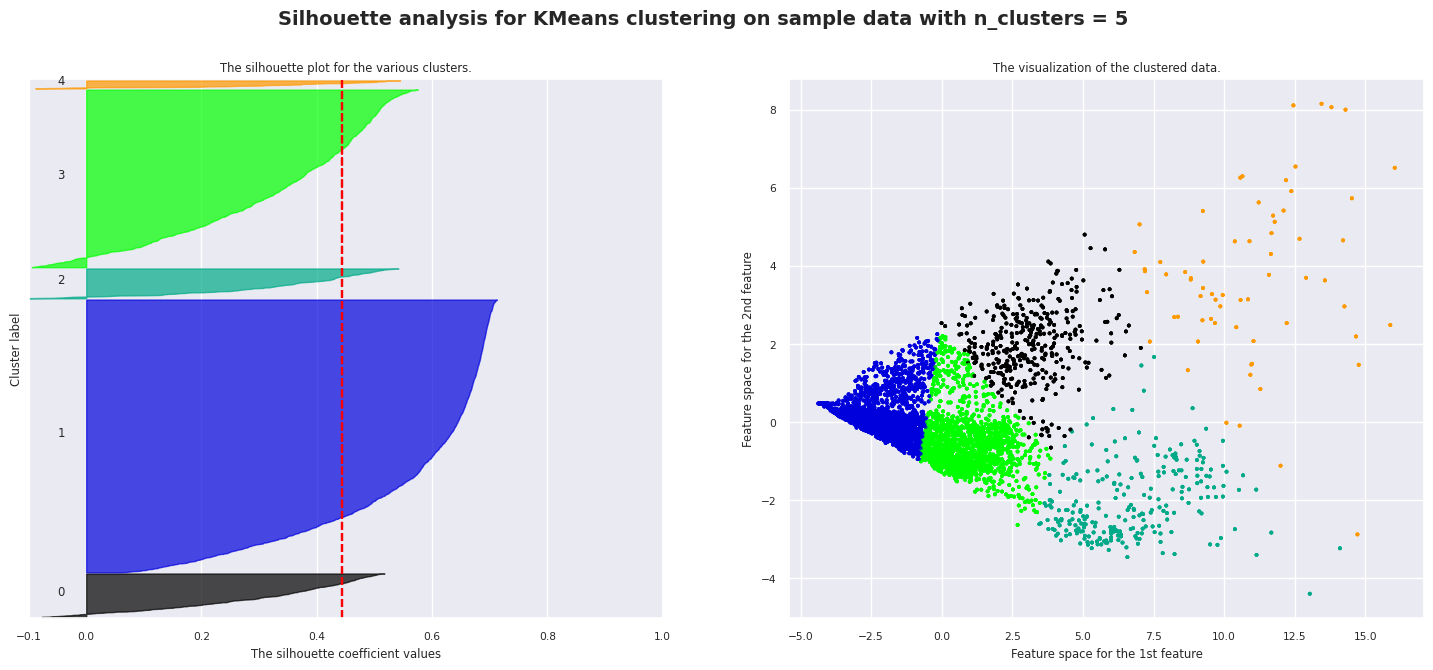

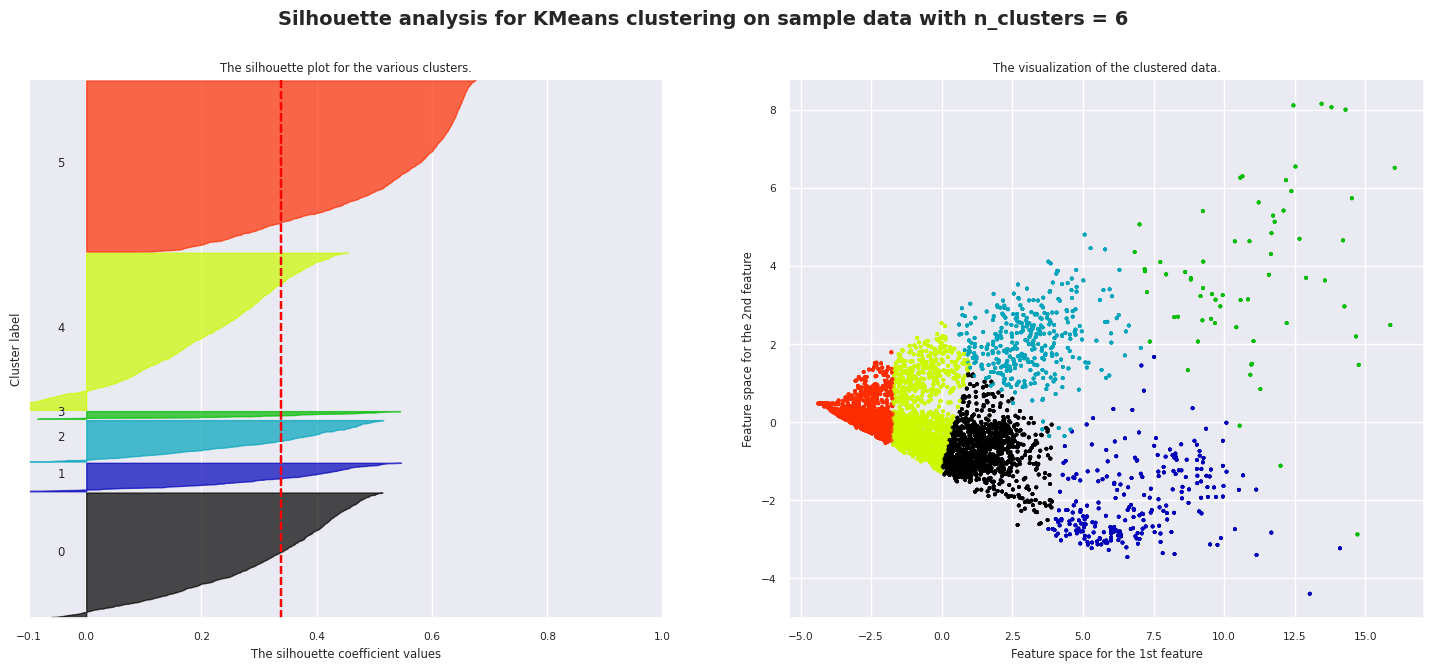

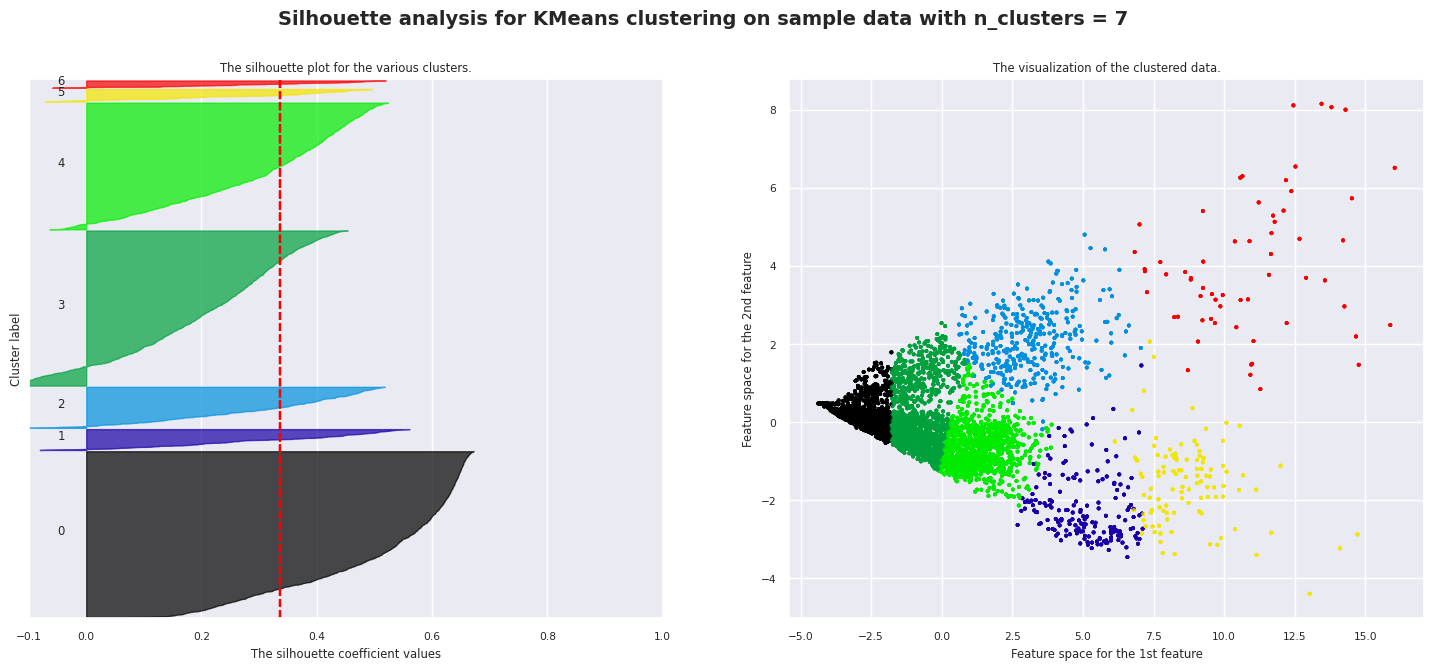

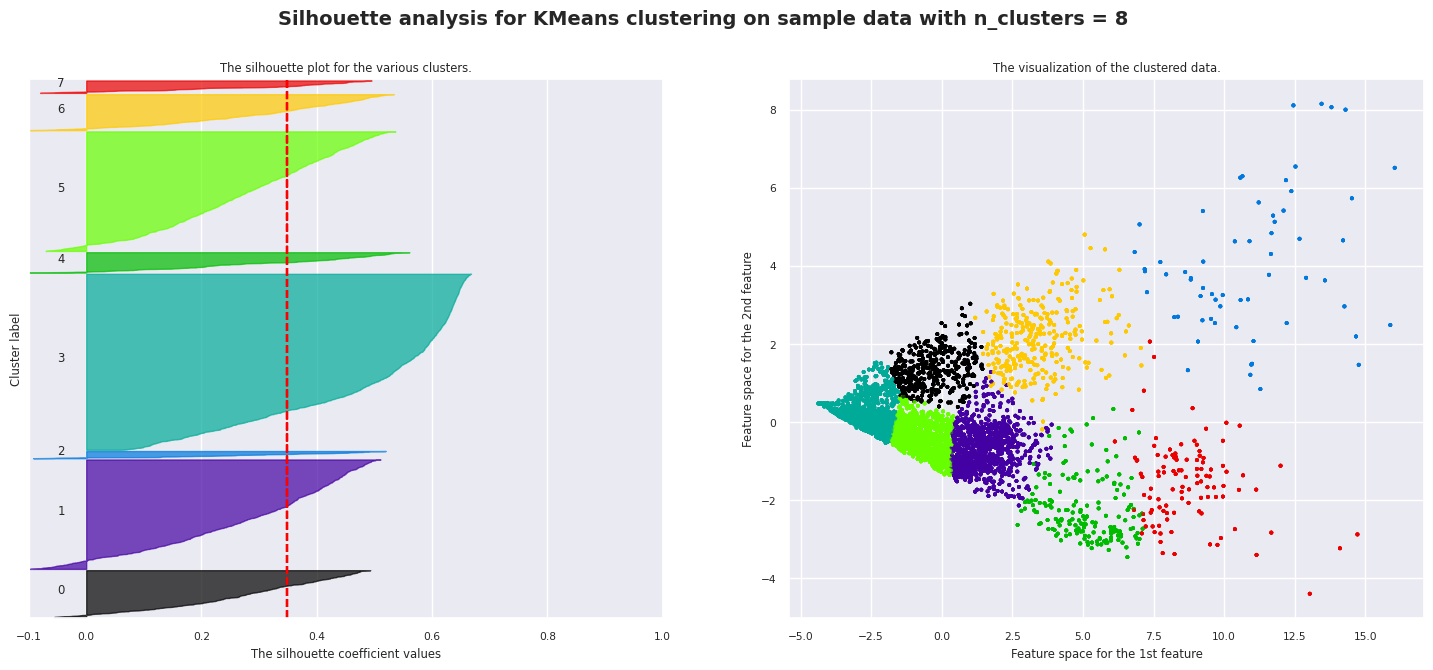

In [48]:
K = [2,3,4,5,6,7,8]
plot_silhouette(KMeans,K,X_pca,"KMeans")

The purpose of visualizing the silhouette score is to gain insights into the quality and appropriateness of the clustering results.

1. Silhouette Histogram:
 - This is a histogram that displays the silhouette scores of individual data points for each cluster.
 - Each cluster has its own color or shading, and the height of the bars represents the density of silhouette scores.
 - This visualization helps to understand the distribution of silhouette scores within each cluster and across clusters.

 the visualization of cluster 5 represent good scroring and cluster separation also representation of elbow show significant score decreasing after cluster 5


## Fit Predict Model

In [49]:
# Perform K-means clustering on reduced data
k_5= KMeans(n_clusters=5, random_state=42)
label5 = k_5.fit_predict(X_pca[:, :n_components])

<Axes: xlabel='0', ylabel='1'>

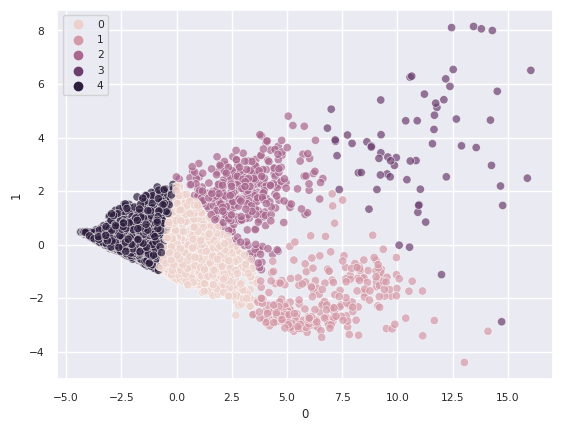

In [50]:
# visualize segmentation of 4 cluster in 2 PC's
sns.scatterplot(x=X_viz[0], y=X_viz[1], hue=label5, alpha=.7)

it show good separation each cluster

## Distribute Label Cluster

In [51]:
df_trans_processing

total_amount  total_balance  transaction_count  Trans Withdrawal_x  \
0         375174.5      3822568.0                239                   0   
1        6302958.6     34932913.4                956                  42   
2         590043.6      6311800.6                234                   0   
3         350971.4      4046141.0                186                   0   
4         166881.4      2107565.8                 84                   0   
...            ...            ...                ...                 ...   
4492     3295795.5     17039965.5                368                  29   
4493     7914744.4     29651823.8                608                  40   
4494     2948081.4     13647981.8                378                   3   
4495     1330010.5     10481659.5                344                   0   
4496     2623161.9      9204071.3                253                  15   

      Trans_Credit  Trans_Debit  Collection From Other Bank  \
0              102          137                          45   
1              304          610                         140   
2               92          142                           0   
3               65          121                          34   
4               35           49                          19   
...            ...          ...                         ...   
4492           183          156                           0   
4493           182          386                          86   
4494           104          271                          51   
4495            81          263                           0   
4496           121          117                          40   

      Credit Card Withdrawal  Credit in Cash  Interest  \
0                          0              12        45   
1                          0              24       140   
2                          0              56        36   
3                          0               1        30   
4                          0               1        15   
...                      ...             ...       ...   
4492                       0              78       105   
4493                       0              10        86   
4494                      22               2        51   
4495                       0              43        38   
4496                       0               1        80   

      Remittance From Other Bank  Trans Withdrawal_y  Household Payment  \
0                             40                  97                 40   
1                            178                 474                130   
2                             78                  64                 26   
3                             59                  62                 29   
4                             14                  35                 14   
...                          ...                 ...                ...   
4492                           0                 185                  0   
4493                         154                 272                 78   
4494                         104                 148                 46   
4495                         160                 103                 34   
4496                           0                 132                  0   

      Insurance Payment  Interest Credit  Loan Payment  \
0                     0               45             0   
1                     0              140            48   
2                    26               36             0   
3                     0               30             0   
4                     0               15             0   
...                 ...              ...           ...   
4492                  0              105             0   
4493                  0               86            76   
4494                  0               51            12   
4495                 34               38            24   
4496                  0               80             0   

      Old age Pension Payment  Payment of

In [52]:
# manipulate new column contain label
df_trans_processing['cluster'] = label5
df_trans_processing

total_amount  total_balance  transaction_count  Trans Withdrawal_x  \
0         375174.5      3822568.0                239                   0   
1        6302958.6     34932913.4                956                  42   
2         590043.6      6311800.6                234                   0   
3         350971.4      4046141.0                186                   0   
4         166881.4      2107565.8                 84                   0   
...            ...            ...                ...                 ...   
4492     3295795.5     17039965.5                368                  29   
4493     7914744.4     29651823.8                608                  40   
4494     2948081.4     13647981.8                378                   3   
4495     1330010.5     10481659.5                344                   0   
4496     2623161.9      9204071.3                253                  15   

      Trans_Credit  Trans_Debit  Collection From Other Bank  \
0              102          137                          45   
1              304          610                         140   
2               92          142                           0   
3               65          121                          34   
4               35           49                          19   
...            ...          ...                         ...   
4492           183          156                           0   
4493           182          386                          86   
4494           104          271                          51   
4495            81          263                           0   
4496           121          117                          40   

      Credit Card Withdrawal  Credit in Cash  Interest  ...  \
0                          0              12        45  ...   
1                          0              24       140  ...   
2                          0              56        36  ...   
3                          0               1        30  ...   
4                          0               1        15  ...   
...                      ...             ...       ...  ...   
4492                       0              78       105  ...   
4493                       0              10        86  ...   
4494                      22               2        51  ...   
4495                       0              43        38  ...   
4496                       0               1        80  ...   

      Trans Withdrawal_y  Household Payment  Insurance Payment  \
0                     97                 40                  0   
1                    474                130                  0   
2                     64                 26                 26   
3                     62                 29                  0   
4                     35                 14                  0   
...                  ...                ...                ...   
4492                 185                  0                  0   
4493                 272                 78                  0   
4494                 148                 46                  0   
4495                 103                 34                 34   
4496                 132                  0                  0   

      Interest Credit  Loan Payment  Old age Pension Payment  \
0                  45             0                        0   
1                 140            48                        0   
2                  36             0                        0   
3                  30             0                       34   
4                  15             0                       19   
...               ...           ...                      ...   
4492              105             0                        0   
4493               86            76                        0   
4494               51            12                        0   
4495               38            24                        0   
4496               80             0                        0   

      Payment of 

## Describe Characteristic Each Cluster

In [53]:
cluster_means = df_trans_processing.groupby('cluster').mean()
# for graded challenge, utilizing visualization in EDA:_clustering_result is a must

In [54]:
cluster_means

total_amount  total_balance  transaction_count  Trans Withdrawal_x  \
cluster                                                                       
0        1.611364e+06   1.217069e+07         346.830892            1.806258   
1        2.902616e+06   2.518258e+07         734.711462            1.181818   
2        4.626721e+06   2.290119e+07         421.412234           23.954787   
3        9.702217e+06   5.096600e+07         881.014925           49.253731   
4        8.138634e+05   5.146402e+06         147.104828            1.812962   

         Trans_Credit  Trans_Debit  Collection From Other Bank  \
cluster                                                          
0          130.505992   214.518642                   21.005326   
1          265.422925   468.106719                   55.581028   
2          159.162234   238.295213                   19.638298   
3          306.865672   524.895522                   57.343284   
4           60.124837    85.167029                   10.771205   

         Credit Card Withdrawal  Credit in Cash    Interest  \
cluster                                                       
0                      3.122503       49.667111   59.833555   
1                      3.679842       82.743083  127.098814   
2                      2.845745       71.199468   68.324468   
3                      6.477612      117.880597  131.641791   
4                      0.933449       22.490213   26.863419   

         Remittance From Other Bank  Trans Withdrawal_y  Household Payment  \
cluster                                                                      
0                         73.916112          139.286285          42.956059   
1                        177.486166          288.122530          97.616601   
2                         64.478723          194.925532          29.390957   
3                        180.059701          387.611940          76.776119   
4                         27.061766           58.984776          16.546324   

         Insurance Payment  Interest Credit  Loan Payment  \
cluster                                                     
0                 6.502663        59.833555      3.361518   
1                13.695652       127.098814      6.873518   
2                 7.372340        68.324468     12.058511   
3                25.313433       131.641791     27.223881   
4                 1.969987        26.863419      1.505872   

         Old age Pension Payment  Payment of Statement  \
cluster                                                  
0                      11.680426             53.043276   
1                      36.490119            113.972332   
2                       0.000000             57.061170   
3                       0.000000            114.537313   
4                       5.457155             21.228795   

         Sanction Negative Bal.  Standard Payment  
cluster                                            
0                      0.436085        149.656458  
1                      0.114625        294.094862  
2                      1.111702        228.167553  
3                      0.029851        454.746269  
4                      0.206177         67.096129

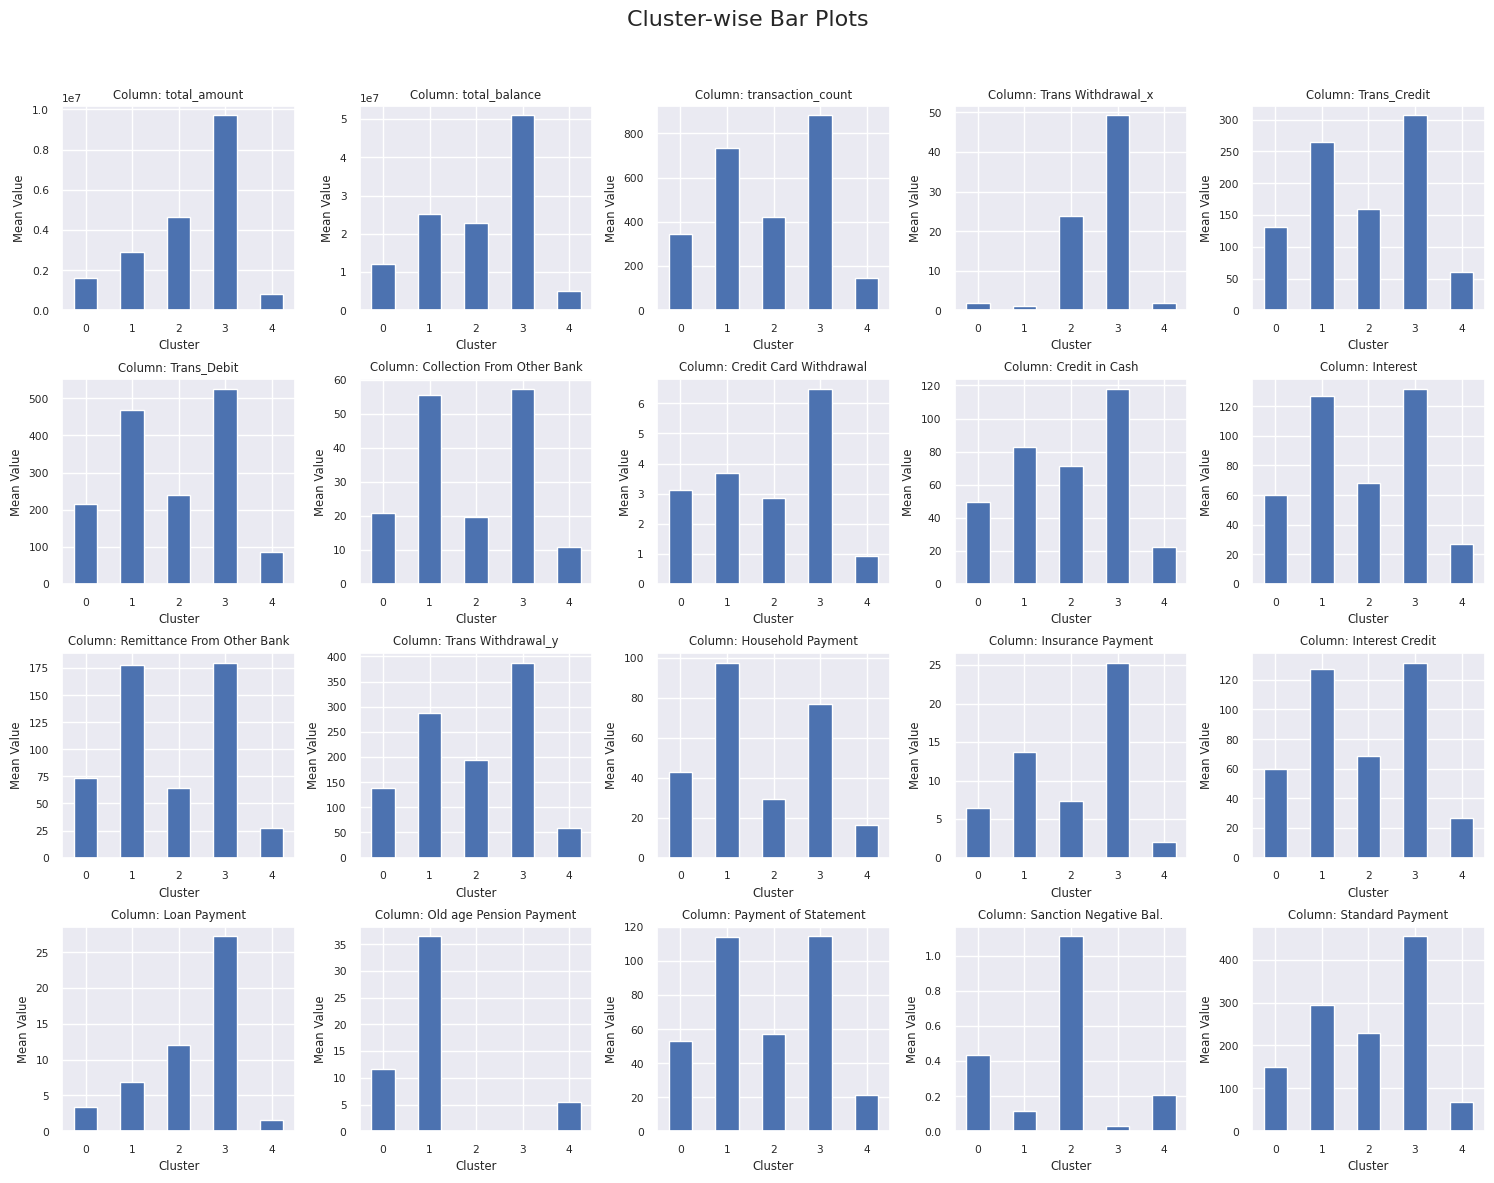

In [55]:
# Set the number of columns to display in each plot
ncol = 5

# Get the total number of columns
num_columns = len(cluster_means.columns)

# Calculate the number of rows for subplots
nrows = (num_columns + ncol - 1) // ncol

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncol, figsize=(15,3 * nrows))
fig.suptitle("Cluster-wise Bar Plots", fontsize=16)

# Flatten the axes array
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(cluster_means.columns):
    ax = axes[i]
    cluster_means[column].plot(kind='bar', ax=ax)
    ax.set_title(f"Column: {column}")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Mean Value")
    ax.set_xticklabels(cluster_means.index, rotation=0)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

**Cluster 0:**
- **total_amount**: Moderate total transaction amount.
- **total_balance**: Relatively low total balance.
- **transaction_count**: Low to moderate number of transactions.
- **Trans Withdrawal_x**: Low withdrawal amount through transaction type 'x'.
- **Trans_Credit**: Moderate credit amount.
- **Trans_Debit**: Moderate debit amount.
- **Collection From Other Bank**: Moderate collection from other banks.
- **Credit Card Withdrawal**: Low credit card withdrawal.
- **Credit in Cash**: Low cash credit.
- **Interest**: Moderate interest amount.
- **Remittance From Other Bank**: Moderate remittance from other banks.
- **Trans Withdrawal_y**: Moderate withdrawal amount through transaction type 'y'.
- **Household Payment**: Moderate payment for household expenses.
- **Insurance Payment**: Low insurance payment.
- **Interest Credit**: Moderate interest credit.
- **Loan Payment**: Moderate loan payment.
- **Old age Pension Payment**: Moderate old age pension payment.
- **Payment of Statement**: Low payment for statement services.
- **Sanction Negative Bal.**: Low negative balance sanction.
- **Standard Payment**: Moderate payment for standard services.

**Cluster 1:**
- **total_amount**: High total transaction amount.
- **total_balance**: High total balance.
- **transaction_count**: High number of transactions.
- **Trans Withdrawal_x**: Low withdrawal amount through transaction type 'x'.
- **Trans_Credit**: High credit amount.
- **Trans_Debit**: High debit amount.
- **Collection From Other Bank**: High collection from other banks.
- **Credit Card Withdrawal**: High credit card withdrawal.
- **Credit in Cash**: High cash credit.
- **Interest**: High interest amount.
- **Remittance From Other Bank**: High remittance from other banks.
- **Trans Withdrawal_y**: High withdrawal amount through transaction type 'y'.
- **Household Payment**: High payment for household expenses.
- **Insurance Payment**: High insurance payment.
- **Interest Credit**: High interest credit.
- **Loan Payment**: High loan payment.
- **Old age Pension Payment**: High old age pension payment.
- **Payment of Statement**: High payment for statement services.
- **Sanction Negative Bal.**: Low negative balance sanction.
- **Standard Payment**: High payment for standard services.

**Cluster 2:**
- **total_amount**: Very high total transaction amount.
- **total_balance**: Moderate total balance.
- **transaction_count**: Moderate number of transactions.
- **Trans Withdrawal_x**: Moderate withdrawal amount through transaction type 'x'.
- **Trans_Credit**: Moderate credit amount.
- **Trans_Debit**: Moderate debit amount.
- **Collection From Other Bank**: Moderate collection from other banks.
- **Credit Card Withdrawal**: Low credit card withdrawal.
- **Credit in Cash**: Moderate cash credit.
- **Interest**: Moderate interest amount.
- **Remittance From Other Bank**: Moderate remittance from other banks.
- **Trans Withdrawal_y**: Moderate withdrawal amount through transaction type 'y'.
- **Household Payment**: Moderate payment for household expenses.
- **Insurance Payment**: Low insurance payment.
- **Interest Credit**: Moderate interest credit.
- **Loan Payment**: Low loan payment.
- **Old age Pension Payment**: Low old age pension payment.
- **Payment of Statement**: Moderate payment for statement services.
- **Sanction Negative Bal.**: Moderate negative balance sanction.
- **Standard Payment**: Very high payment for standard services.

**Cluster 3:**
- **total_amount**: Extremely high total transaction amount.
- **total_balance**: Very high total balance.
- **transaction_count**: Very high number of transactions.
- **Trans Withdrawal_x**: High withdrawal amount through transaction type 'x'.
- **Trans_Credit**: Very high credit amount.
- **Trans_Debit**: Very high debit amount.
- **Collection From Other Bank**: Very high collection from other banks.
- **Credit Card Withdrawal**: High credit card withdrawal.
- **Credit in Cash**: Very high cash credit.
- **Interest**: Very high interest amount.
- **Remittance From Other Bank**: Very high remittance from other banks.
- **Trans Withdrawal_y**: Very high withdrawal amount through transaction type 'y'.
- **Household Payment**: Very high payment for household expenses.
- **Insurance Payment**: Very high insurance payment.
- **Interest Credit**: Very high interest credit.
- **Loan Payment**: Very high loan payment.
- **Old age Pension Payment**: Very high old age pension payment.
- **Payment of Statement**: Very high payment for statement services.
- **Sanction Negative Bal.**: Very low negative balance sanction.
- **Standard Payment**: Extremely high payment for standard services.

**Cluster 4:**
- **total_amount**: Low total transaction amount.
- **total_balance**: Low total balance.
- **transaction_count**: Low number of transactions.
- **Trans Withdrawal_x**: Low withdrawal amount through transaction type 'x'.
- **Trans_Credit**: Low credit amount.
- **Trans_Debit**: Low debit amount.
- **Collection From Other Bank**: Low collection from other banks.
- **Credit Card Withdrawal**: Very low credit card withdrawal.
- **Credit in Cash**: Very low cash credit.
- **Interest**: Very low interest amount.
- **Remittance From Other Bank**: Very low remittance from other banks.
- **Trans Withdrawal_y**: Very low withdrawal amount through transaction type 'y'.
- **Household Payment**: Very low payment for household expenses.
- **Insurance Payment**: Very low insurance payment.
- **Interest Credit**: Very low interest credit.
- **Loan Payment**: Very low loan payment.
- **Old age Pension Payment**: Very low old age pension payment.
- **Payment of Statement**: Very low payment for statement services.
- **Sanction Negative Bal.**: Low negative balance sanction.
- **Standard Payment**: Very low payment for standard services.


create a categorize table based on cluster result

In [56]:
cluster_result = {
    'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
    'total_amount': ['Moderate', 'High', 'Very High', 'Extremely High', 'Low'],
    'total_balance': ['Relatively Low', 'High', 'Moderate', 'Very High', 'Low'],
    'transaction_count': ['Low to Moderate', 'High', 'Moderate', 'Very High', 'Low'],
    'Trans Withdrawal_x': ['Low', 'Low', 'Moderate', 'High', 'Low'],
    'Trans_Credit': ['Moderate', 'High', 'Moderate', 'Very High', 'Low'],
    'Trans_Debit': ['Moderate', 'High', 'Moderate', 'Very High', 'Low'],
    'Collection From Other Bank': ['Moderate', 'High', 'Moderate', 'Very High', 'Low'],
    'Credit Card Withdrawal': ['Low', 'High', 'Low', 'High', 'Very Low'],
    'Credit in Cash': ['Low', 'High', 'Moderate', 'Very High', 'Very Low'],
    'Interest': ['Moderate', 'High', 'Moderate', 'Very High', 'Very Low'],
    'Remittance From Other Bank': ['Moderate', 'High', 'Moderate', 'Very High', 'Very Low'],
    'Trans Withdrawal_y': ['Moderate', 'High', 'Moderate', 'Very High', 'Very Low'],
    'Household Payment': ['Moderate', 'High', 'Moderate', 'Very High', 'Very Low'],
    'Insurance Payment': ['Low', 'High', 'Low', 'Very High', 'Very Low'],
    'Interest Credit': ['Moderate', 'High', 'Moderate', 'Very High', 'Very Low'],
    'Loan Payment': ['Moderate', 'High', 'Low', 'Very High', 'Very Low'],
    'Old age Pension Payment': ['Moderate', 'High', 'Low', 'Very High', 'Very Low'],
    'Payment of Statement': ['Low', 'High', 'Moderate', 'Very High', 'Very Low'],
    'Sanction Negative Bal.': ['Low', 'Low', 'Moderate', 'Very Low', 'Low'],
    'Standard Payment': ['Moderate', 'High', 'Very High', 'Extremely High', 'Very Low']
}

cluster_result = pd.DataFrame(cluster_result)
cluster_result

Cluster    total_amount   total_balance transaction_count  \
0  Cluster 0        Moderate  Relatively Low   Low to Moderate   
1  Cluster 1            High            High              High   
2  Cluster 2       Very High        Moderate          Moderate   
3  Cluster 3  Extremely High       Very High         Very High   
4  Cluster 4             Low             Low               Low   

  Trans Withdrawal_x Trans_Credit Trans_Debit Collection From Other Bank  \
0                Low     Moderate    Moderate                   Moderate   
1                Low         High        High                       High   
2           Moderate     Moderate    Moderate                   Moderate   
3               High    Very High   Very High                  Very High   
4                Low          Low         Low                        Low   

  Credit Card Withdrawal Credit in Cash  ... Remittance From Other Bank  \
0                    Low            Low  ...                   Moderate   
1                   High           High  ...                       High   
2                    Low       Moderate  ...                   Moderate   
3                   High      Very High  ...                  Very High   
4               Very Low       Very Low  ...                   Very Low   

  Trans Withdrawal_y Household Payment Insurance Payment Interest Credit  \
0           Moderate          Moderate               Low        Moderate   
1               High              High              High            High   
2           Moderate          Moderate               Low        Moderate   
3          Very High         Very High         Very High       Very High   
4           Very Low          Very Low          Very Low        Very Low   

  Loan Payment Old age Pension Payment Payment of Statement  \
0     Moderate                Moderate                  Low   
1         High                    High                 High   
2          Low                     Low             Moderate   
3    Very High               Very High            Very High   
4     Very Low                Very Low             Very Low   

  Sanction Negative Bal. Standard Payment  
0                    Low         Moderate  
1                    Low             High  
2               Moderate        Very High  
3               Very Low   Extremely High  
4                    Low         Very Low  

[5 rows x 21 columns]

Based on characteristic cluster category we can create a specific product that match the cluster profiles such as pension saving package, investment package and mortgage package

## Mock up Bank Product

create mock_up package for pension saving

In [57]:
pension_package = {
    "Cluster": [0, 1, 2, 3, 4],
    "Product Name": [
        "Pension Plus",
        "Pension Elite",
        "Pension Pro",
        "Pension Premium",
        "Pension Basic"
    ],
    "Features": [
        ["Moderate monthly contribution amount.",
         "Relatively low initial balance requirement.",
         "Suitable for individuals with a low to moderate number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "Moderate credit and debit amounts.",
         "Moderate collection from other banks.",
         "Low credit card withdrawal and cash credit.",
         "Moderate interest and remittance from other banks.",
         "Moderate withdrawal amount through transaction type 'y'.",
         "Moderate payment for household expenses.",
         "Low insurance payment.",
         "Moderate interest credit and loan payment.",
         "Moderate old age pension payment.",
         "Low payment for statement services.",
         "Low negative balance sanction.",
         "Moderate payment for standard services."],
        ["High monthly contribution amount.",
         "High initial balance requirement.",
         "Suitable for individuals with a high number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "High credit and debit amounts.",
         "High collection from other banks and credit card withdrawal.",
         "High cash credit and interest.",
         "High remittance from other banks and withdrawal amount through transaction type 'y'.",
         "High payment for household expenses and insurance.",
         "High interest credit and loan payment.",
         "High old age pension payment.",
         "High payment for statement services.",
         "Low negative balance sanction.",
         "High payment for standard services."],
        ["Very high monthly contribution amount.",
         "Moderate initial balance requirement.",
         "Suitable for individuals with a moderate number of transactions.",
         "Moderate withdrawal amount through transaction type 'x'.",
         "Moderate credit and debit amounts.",
         "Moderate collection from other banks.",
         "Low credit card withdrawal and moderate cash credit.",
         "Moderate interest and remittance from other banks.",
         "Moderate withdrawal amount through transaction type 'y'.",
         "Moderate payment for household expenses and insurance.",
         "Moderate interest credit and low loan payment.",
         "Low old age pension payment.",
         "Moderate payment for statement services.",
         "Moderate negative balance sanction.",
         "Very high payment for standard services."],
        ["Extremely high monthly contribution amount.",
         "Very high initial balance requirement.",
         "Suitable for individuals with a very high number of transactions.",
         "High withdrawal amount through transaction type 'x'.",
         "Very high credit and debit amounts.",
         "Very high collection from other banks and credit card withdrawal.",
         "Very high cash credit and interest.",
         "Very high remittance from other banks and withdrawal amount through transaction type 'y'.",
         "Very high payment for household expenses and insurance.",
         "Very high interest credit and loan payment.",
         "Very high old age pension payment.",
         "Very high payment for statement services.",
         "Very low negative balance sanction.",
         "Extremely high payment for standard services."],
        ["Low monthly contribution amount.",
         "Low initial balance requirement.",
         "Suitable for individuals with a low number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "Low credit and debit amounts.",
         "Low collection from other banks and credit card withdrawal.",
         "Very low cash credit and interest.",
         "Very low remittance from other banks and withdrawal amount through transaction type 'y'.",
         "Very low payment for household expenses and insurance.",
         "Very low interest credit and loan payment.",
         "Very low old age pension payment.",
         "Very low payment for statement services.",
         "Low negative balance sanction.",
         "Very low payment for standard services."]
    ]
}

pension_package = pd.DataFrame(pension_package)
pension_package

Cluster     Product Name                                           Features
0        0     Pension Plus  [Moderate monthly contribution amount., Relati...
1        1    Pension Elite  [High monthly contribution amount., High initi...
2        2      Pension Pro  [Very high monthly contribution amount., Moder...
3        3  Pension Premium  [Extremely high monthly contribution amount., ...
4        4    Pension Basic  [Low monthly contribution amount., Low initial...

create mock up package for investment

In [58]:
investment_package = {
    "Cluster": [0, 1, 2, 3, 4],
    "Product Name": [
        "Growth Fund Starter",
        "Wealth Builder Pro",
        "Balanced Portfolio Plus",
        "Elite Investor Package",
        "Starter Investment Package"
    ],
    "Features": [
        ["Invest in a diversified portfolio with a moderate total amount.",
         "Suitable for individuals with a low to moderate number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "Moderate credit and debit amounts.",
         "Moderate collection from other banks.",
         "Low credit card withdrawal and cash credit.",
         "Moderate interest and remittance from other banks.",
         "Moderate withdrawal amount through transaction type 'y'.",
         "Moderate payment for household expenses.",
         "Low insurance payment.",
         "Moderate interest credit and loan payment.",
         "Moderate old age pension payment.",
         "Low payment for statement services.",
         "Low negative balance sanction.",
         "Moderate payment for standard services."],
        ["Invest in a diversified portfolio with a high total amount.",
         "Suitable for individuals with a high number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "High credit and debit amounts.",
         "High collection from other banks and credit card withdrawal.",
         "High cash credit and interest.",
         "High remittance from other banks and withdrawal amount through transaction type 'y'.",
         "High payment for household expenses and insurance.",
         "High interest credit and loan payment.",
         "High old age pension payment.",
         "High payment for statement services.",
         "Low negative balance sanction.",
         "High payment for standard services."],
        ["Invest in a diversified portfolio with a very high total amount.",
         "Suitable for individuals with a moderate number of transactions.",
         "Moderate withdrawal amount through transaction type 'x'.",
         "Moderate credit and debit amounts.",
         "Moderate collection from other banks.",
         "Low credit card withdrawal and moderate cash credit.",
         "Moderate interest and remittance from other banks.",
         "Moderate withdrawal amount through transaction type 'y'.",
         "Moderate payment for household expenses and insurance.",
         "Moderate interest credit and low loan payment.",
         "Low old age pension payment.",
         "Moderate payment for statement services.",
         "Moderate negative balance sanction.",
         "Very high payment for standard services."],
        ["Invest in a diversified portfolio with an extremely high total amount.",
         "Suitable for individuals with a very high number of transactions.",
         "High withdrawal amount through transaction type 'x'.",
         "Very high credit and debit amounts.",
         "Very high collection from other banks and credit card withdrawal.",
         "Very high cash credit and interest.",
         "Very high remittance from other banks and withdrawal amount through transaction type 'y'.",
         "Very high payment for household expenses and insurance.",
         "Very high interest credit and loan payment.",
         "Very high old age pension payment.",
         "Very high payment for statement services.",
         "Very low negative balance sanction.",
         "Extremely high payment for standard services."],
        ["Invest in a diversified portfolio with a low total amount.",
         "Suitable for individuals with a low number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "Low credit and debit amounts.",
         "Low collection from other banks and credit card withdrawal.",
         "Very low cash credit and interest.",
         "Very low remittance from other banks and withdrawal amount through transaction type 'y'.",
         "Very low payment for household expenses and insurance.",
         "Very low interest credit and loan payment.",
         "Very low old age pension payment.",
         "Very low payment for statement services.",
         "Low negative balance sanction.",
         "Very low payment for standard services."]
    ]
}

investment_package = pd.DataFrame(investment_package)
investment_package

Cluster                Product Name  \
0        0         Growth Fund Starter   
1        1          Wealth Builder Pro   
2        2     Balanced Portfolio Plus   
3        3      Elite Investor Package   
4        4  Starter Investment Package   

                                            Features  
0  [Invest in a diversified portfolio with a mode...  
1  [Invest in a diversified portfolio with a high...  
2  [Invest in a diversified portfolio with a very...  
3  [Invest in a diversified portfolio with an ext...  
4  [Invest in a diversified portfolio with a low ...

create mock up package for mortgage

In [59]:
mortgage_package = {
    "Cluster": [0, 1, 2, 3, 4],
    "Product Name": [
        "HomeStart Mortgage",
        "DreamHome Mortgage",
        "HomeFlex Mortgage",
        "PremiumHome Mortgage",
        "BasicHome Mortgage"
    ],
    "Features": [
        ["Obtain a mortgage loan with a moderate total amount.",
         "Suitable for individuals with a low to moderate number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "Moderate credit and debit amounts.",
         "Moderate collection from other banks.",
         "Low credit card withdrawal and cash credit.",
         "Moderate interest and remittance from other banks.",
         "Moderate withdrawal amount through transaction type 'y'.",
         "Moderate payment for household expenses.",
         "Low insurance payment.",
         "Moderate interest credit and loan payment.",
         "Moderate old age pension payment.",
         "Low payment for statement services.",
         "Low negative balance sanction.",
         "Moderate payment for standard services."],
        ["Obtain a mortgage loan with a high total amount.",
         "Suitable for individuals with a high number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "High credit and debit amounts.",
         "High collection from other banks and credit card withdrawal.",
         "High cash credit and interest.",
         "High remittance from other banks and withdrawal amount through transaction type 'y'.",
         "High payment for household expenses and insurance.",
         "High interest credit and loan payment.",
         "High old age pension payment.",
         "High payment for statement services.",
         "Low negative balance sanction.",
         "High payment for standard services."],
        ["Obtain a mortgage loan with a very high total amount.",
         "Suitable for individuals with a moderate number of transactions.",
         "Moderate withdrawal amount through transaction type 'x'.",
         "Moderate credit and debit amounts.",
         "Moderate collection from other banks.",
         "Low credit card withdrawal and moderate cash credit.",
         "Moderate interest and remittance from other banks.",
         "Moderate withdrawal amount through transaction type 'y'.",
         "Moderate payment for household expenses and insurance.",
         "Moderate interest credit and low loan payment.",
         "Low old age pension payment.",
         "Moderate payment for statement services.",
         "Moderate negative balance sanction.",
         "Very high payment for standard services."],
        ["Obtain a mortgage loan with an extremely high total amount.",
         "Suitable for individuals with a very high number of transactions.",
         "High withdrawal amount through transaction type 'x'.",
         "Very high credit and debit amounts.",
         "Very high collection from other banks and credit card withdrawal.",
         "Very high cash credit and interest.",
         "Very high remittance from other banks and withdrawal amount through transaction type 'y'.",
         "Very high payment for household expenses and insurance.",
         "Very high interest credit and loan payment.",
         "Very high old age pension payment.",
         "Very high payment for statement services.",
         "Very low negative balance sanction.",
         "Extremely high payment for standard services."],
        ["Obtain a mortgage loan with a low total amount.",
         "Suitable for individuals with a low number of transactions.",
         "Low withdrawal amount through transaction type 'x'.",
         "Low credit and debit amounts.",
         "Low collection from other banks and credit card withdrawal.",
         "Very low cash credit and interest.",
         "Very low remittance from other banks and withdrawal amount through transaction type 'y'.",
         "Very low payment for household expenses and insurance.",
         "Very low interest credit and loan payment.",
         "Very low old age pension payment.",
         "Very low payment for statement services.",
         "Low negative balance sanction.",
         "Very low payment for standard services."]
    ]
}

mortgage_package = pd.DataFrame(mortgage_package)
mortgage_package

Cluster          Product Name  \
0        0    HomeStart Mortgage   
1        1    DreamHome Mortgage   
2        2     HomeFlex Mortgage   
3        3  PremiumHome Mortgage   
4        4    BasicHome Mortgage   

                                            Features  
0  [Obtain a mortgage loan with a moderate total ...  
1  [Obtain a mortgage loan with a high total amou...  
2  [Obtain a mortgage loan with a very high total...  
3  [Obtain a mortgage loan with an extremely high...  
4  [Obtain a mortgage loan with a low total amoun...

# PIPEPLINE

In [60]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# MODEL SAVE

In [61]:
# Example: Save DataFrame to CSV with compression
df_trans.to_csv('df_trans.csv', index=False)

In [62]:
pension_package.to_csv('pension_package.csv', index=False)
investment_package.to_csv('investment_package.csv', index=False)
mortgage_package.to_csv('mortgage_package.csv', index=False)

In [63]:
with open('selected_features.txt', 'w') as file_1:
  file_1.write(str(selected_features))
with open('n_components.txt', 'w') as file_2:
  file_2.write(str(n_components))

pickle.dump(pipeline, open('pipeline.pkl', 'wb'))

# MODEL LOAD

In [64]:
# Load selected_features from the text file
with open('selected_features.txt', 'r') as file_1:
  selected_features = file_1.read()

# Load n_components from the text file
with open('n_components.txt', 'r') as file_2:
  n_components  = file_2.read()

# Load the cluster labels using pickle
loaded_cluster = pickle.load(open('pipeline.pkl', 'rb'))

In [65]:
pension = pd.read_csv("pension_package.csv")
investment = pd.read_csv("investment_package.csv")
mortgage = pd.read_csv("mortgage_package.csv")

In [66]:
new_df = pd.read_csv("df_trans.csv")
new_df

account_id  total_amount  total_balance  transaction_count  \
0              1      375174.5      3822568.0                239   
1              2     6302958.6     34932913.4                956   
2              3      590043.6      6311800.6                234   
3              4      350971.4      4046141.0                186   
4              5      166881.4      2107565.8                 84   
...          ...           ...            ...                ...   
4492       11333     3295795.5     17039965.5                368   
4493       11349     7914744.4     29651823.8                608   
4494       11359     2948081.4     13647981.8                378   
4495       11362     1330010.5     10481659.5                344   
4496       11382     2623161.9      9204071.3                253   

      Trans Withdrawal_x  Trans_Credit  Trans_Debit  \
0                      0           102          137   
1                     42           304          610   
2                      0            92          142   
3                      0            65          121   
4                      0            35           49   
...                  ...           ...          ...   
4492                  29           183          156   
4493                  40           182          386   
4494                   3           104          271   
4495                   0            81          263   
4496                  15           121          117   

      Collection From Other Bank  Credit Card Withdrawal  Credit in Cash  ...  \
0                             45                       0              12  ...   
1                            140                       0              24  ...   
2                              0                       0              56  ...   
3                             34                       0               1  ...   
4                             19                       0               1  ...   
...                          ...                     ...             ...  ...   
4492                           0                       0              78  ...   
4493                          86                       0              10  ...   
4494                          51                      22               2  ...   
4495                           0                       0              43  ...   
4496                          40                       0               1  ...   

      Remittance From Other Bank  Trans Withdrawal_y  Household Payment  \
0                             40                  97                 40   
1                            178                 474                130   
2                             78                  64                 26   
3                             59                  62                 29   
4                             14                  35                 14   
...                          ...                 ...                ...   
4492                           0                 185                  0   
4493                         154                 272                 78   
4494                         104                 148                 46   
4495                         160                 103                 34   
4496                           0                 132                  0   

      Insurance Payment  Interest Credit  Loan Payment  \
0                     0               45             0   
1                     0              140            48   
2                    26               36             0   
3                     0               30             0   
4                     0               15             0   
...                 ...              ...           ...   
4492                  0              105             0   
4493                  0               86            76   
4494                  0               51            12   
4495                 34               38            24   
4496            

In [67]:
inference = new_df.sample(3)

In [68]:
inference

account_id  total_amount  total_balance  transaction_count  \
60            64      217929.8      1064735.1                 44   
1994        2094      179226.1      2193041.0                128   
4012        5133     1893311.3      9945206.0                196   

      Trans Withdrawal_x  Trans_Credit  Trans_Debit  \
60                     0            30           14   
1994                   0            53           75   
4012                   5            63          128   

      Collection From Other Bank  Credit Card Withdrawal  Credit in Cash  ...  \
60                             0                       0              11  ...   
1994                          28                       0               1  ...   
4012                           0                       0              38  ...   

      Remittance From Other Bank  Trans Withdrawal_y  Household Payment  \
60                             0                  14                  0   
1994                          23                  52                 23   
4012                          65                  68                 18   

      Insurance Payment  Interest Credit  Loan Payment  \
60                    0               19             0   
1994                  0               24             0   
4012                 18               25            11   

      Old age Pension Payment  Payment of Statement  Sanction Negative Bal.  \
60                          0                     0                       0   
1994                        0                    23                       0   
4012                        0                    18                       0   

      Standard Payment  
60                  25  
1994                58  
4012                88  

[3 rows x 21 columns]

In [69]:
new_df = pipeline.fit(new_df)

In [70]:
new_df

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [71]:
predict = pipeline.predict(inference)

In [72]:
predict

array([0, 0, 0], dtype=int32)

In [73]:
inference['cluster'] = predict
inference

account_id  total_amount  total_balance  transaction_count  \
60            64      217929.8      1064735.1                 44   
1994        2094      179226.1      2193041.0                128   
4012        5133     1893311.3      9945206.0                196   

      Trans Withdrawal_x  Trans_Credit  Trans_Debit  \
60                     0            30           14   
1994                   0            53           75   
4012                   5            63          128   

      Collection From Other Bank  Credit Card Withdrawal  Credit in Cash  ...  \
60                             0                       0              11  ...   
1994                          28                       0               1  ...   
4012                           0                       0              38  ...   

      Trans Withdrawal_y  Household Payment  Insurance Payment  \
60                    14                  0                  0   
1994                  52                 23                  0   
4012                  68                 18                 18   

      Interest Credit  Loan Payment  Old age Pension Payment  \
60                 19             0                        0   
1994               24             0                        0   
4012               25            11                        0   

      Payment of Statement  Sanction Negative Bal.  Standard Payment  cluster  
60                       0                       0                25        0  
1994                    23                       0                58        0  
4012                    18                       0                88        0  

[3 rows x 22 columns]

In [74]:
for index, values in inference.iterrows():
    for idx_ps, val_ps in pension.iterrows():
        if values['cluster'] == val_ps['Cluster']:
            print(f'For account : ', values['account_id'])
            print('Based on the client characteristic, here are the pension package product to offer :\n')
            print(f"Product Name: {val_ps['Product Name']} \n")
            val_ps_def = val_ps['Features'].split(',')
            print(f'Features :\n')
            for i in val_ps_def:
                i = i.strip(" '\"[]")
                print('*', i)
            # Print a separator
            print("\n----------------\n")
    for idx_iv, val_iv in investment.iterrows():
        if values['cluster'] == val_iv['Cluster']:
            print(f'For account : ', values['account_id'])
            print('Based on the client characteristic, here are the investment package product to offer :\n')
            print(f"Product Name: {val_iv['Product Name']} \n")
            val_iv_def = val_iv['Features'].split(',')
            print(f'Features :\n')
            for h in val_iv_def:
                h = h.strip(" '\"[]")
                print('*', h)
            # Print a separator
            print("\n----------------\n")
    for idx_mg, val_mg in mortgage.iterrows():
        if values['cluster'] == val_mg['Cluster']:
            print(f'For account : ', values['account_id'])
            print('Based on the client characteristic, here are the mortgage package product to offer :\n')
            print(f"Product Name: {val_mg['Product Name']} \n")
            val_mg_def = val_mg['Features'].split(',')
            print(f'Features :\n')
            for j in val_mg_def:
                j = j.strip(" '\"[]")
                print('*', j)
            # Print a separator
            print("\n----------------\n")

For account :  64.0
Based on the client characteristic, here are the pension package product to offer :

Product Name: Pension Plus 

Features :

* Moderate monthly contribution amount.
* Relatively low initial balance requirement.
* Suitable for individuals with a low to moderate number of transactions.
* Low withdrawal amount through transaction type 'x'.
* Moderate credit and debit amounts.
* Moderate collection from other banks.
* Low credit card withdrawal and cash credit.
* Moderate interest and remittance from other banks.
* Moderate withdrawal amount through transaction type 'y'.
* Moderate payment for household expenses.
* Low insurance payment.
* Moderate interest credit and loan payment.
* Moderate old age pension payment.
* Low payment for statement services.
* Low negative balance sanction.
* Moderate payment for standard services.

----------------

For account :  64.0
Based on the client characteristic, here are the investment package product to offer :

Product Name: Gr

# CONCLUSION

### EDA Conclusion
1. Customer Behavior Analysis Result:
 - DISPONENT customers prefer debit card transactions, while OWNER customers use a more balanced mix of credit and debit cards.
 - Spending amounts and account balances vary across regions, with "central Bohemia" and "south Bohemia" showing higher spending.
 - "Prague" demonstrates balanced spending and account balances, while "west Bohemia" displays lower spending.
 - These insights suggest diverse financial behaviors and preferences among regions.

2. Credit Risk Assessment Result:
 - Some regions lack credit utilization data, limiting a comprehensive overview.
 - Available data indicates higher credit utilization in "south Bohemia."
 - No consistent trend between unemployment rates and default rates was observed.
 - Missing data underscores limitations in assessing unemployment's direct impact on default rates.

3. Geographic Analysis Result:
 - Positive linear relationship between "number of inhabitants" and "urban ratio."
Suggests that larger populations correspond to higher urbanization levels.

4. Gender Analysis Result:
 - Positive correlation between "average salary" and "number of inhabitants."
Indicates that population size is associated with higher income levels.
Dataset demonstrates a balanced gender distribution, ensuring equal representation.

5. Time Series Analysis Result:
 - Increasing transaction volume observed over the analyzed time span.
Fluctuations in transaction amounts, with December showing higher activity.
Suggests potential seasonality or holiday-related spending patterns.



### Cluster Conclusion

The clustering analysis using K-means yielded five distinct clusters with varying financial characteristics. Each cluster represents a different group of customers, and the associated financial attributes provide valuable insights for tailoring product offerings and services in the banking industry.

**Cluster 0:**
- Represents customers with moderate total transaction amounts and relatively low total balances.
- Engage in a low to moderate number of transactions, often with low withdrawal amounts through transaction type 'x'.
- Show moderate credit and debit amounts, as well as moderate collection from other banks.
- Tend to have moderate payment habits for household expenses, standard services, and moderate interest credit.

**Cluster 1:**
- Comprises customers with high total transaction amounts and high total balances.
- Engage in a high number of transactions, often with low withdrawal amounts through transaction type 'x'.
- Display high credit and debit amounts, along with high collection from other banks.
- Tend to have high payment habits for household expenses, standard services, and high interest credit.

**Cluster 2:**
- Encompasses customers with very high total transaction amounts and moderate total balances.
- Engage in a moderate number of transactions, often with moderate withdrawal amounts through transaction type 'x'.
- Show moderate credit and debit amounts, as well as moderate collection from other banks.
- Tend to have moderate payment habits for household expenses, standard services, and moderate interest credit.

**Cluster 3:**
- Represents customers with extremely high total transaction amounts and very high total balances.
- Engage in a very high number of transactions, often with high withdrawal amounts through transaction type 'x'.
- Display very high credit and debit amounts, along with very high collection from other banks.
- Tend to have very high payment habits for household expenses, standard services, and very high interest credit.

**Cluster 4:**
- Consists of customers with low total transaction amounts and low total balances.
- Engage in a low number of transactions, often with low withdrawal amounts through transaction type 'x'.
- Show low credit and debit amounts, as well as low collection from other banks.
- Tend to have low payment habits for household expenses, standard services, and low interest credit.

## Business Implications

The insights derived from the clustering analysis can have significant business implications for the banking industry:

1. **Tailored Product Offerings:** The distinct financial characteristics of each cluster allow banks to design and offer customized financial products and services that align with the preferences and behaviors of specific customer groups. For example, Cluster 1 customers may be more interested in high-value investment products, while Cluster 4 customers might benefit from budget-friendly savings options.

2. **Marketing Strategy:** By understanding the financial habits of different clusters, banks can develop targeted marketing campaigns that resonate with specific customer segments. This can lead to more effective communication and engagement with customers, resulting in increased customer satisfaction and loyalty.

3. **Risk Management:** Insights from clustering can aid in identifying high-risk and low-risk customer groups. Banks can allocate resources more efficiently by focusing risk management efforts on clusters with higher default rates and tailoring credit offerings accordingly.

4. **Customer Experience Enhancement:** Cluster-specific insights can guide improvements in customer experience. For instance, Cluster 3 customers, who engage in high-value transactions, may benefit from personalized wealth management services, while Cluster 0 customers might appreciate educational resources to improve their financial literacy.

5. **Branch and Service Allocation:** By understanding geographic and demographic patterns, banks can optimize branch locations and service offerings. For instance, areas with higher urbanization (Cluster 3) may require more investment in advanced digital banking solutions, while areas with lower financial activity (Cluster 4) might benefit from targeted local branch support.

In conclusion, the combination of exploratory data analysis (EDA) and clustering analysis provides a comprehensive understanding of customer behaviors and preferences, enabling banks to make informed decisions, tailor their strategies, and enhance overall customer satisfaction and financial performance.